In [10]:
# Import relevant items
import pandas as pd
import numpy as np

import seaborn as sns
%matplotlib inline


In [11]:
# Let's first load the data and take a look at what we have.
df = pd.read_csv('Beijing_cleaned.csv')

In [12]:
print(df.head())
print(df.columns)

                  date  aqi  so2  so2_24h  no2  no2_24h   co  co_24h  o3  \
0  2014-05-02 01:00:00   32    4       20   10       31  0.4   0.904  71   
1  2014-05-02 02:00:00   26    4       20   10       30  0.4   0.883  70   
2  2014-05-02 03:00:00   35    4       19    9       29  0.4   0.867  73   
3  2014-05-02 04:00:00   24    4       19    9       27  0.4   0.846  74   
4  2014-05-02 05:00:00   25    4       18    8       26  0.4   0.825  79   

   o3_24h  o3_8h  o3_8h_24h  pm10  pm10_24h  pm2_5  pm2_5_24h  month  day  \
0     206     77        175    30       171     22        112      5    2   
1     206     70        175    26       165     18        108      5    2   
2     206     71        175    27       158     24        105      5    2   
3     206     73        175    17       151     14        100      5    2   
4     206     73        175    20       145     17         95      5    2   

   hour  
0     1  
1     2  
2     3  
3     4  
4     5  
Index(['date', 'aqi'

In [13]:
df.dtypes

date          object
aqi            int64
so2            int64
so2_24h        int64
no2            int64
no2_24h        int64
co           float64
co_24h       float64
o3             int64
o3_24h         int64
o3_8h          int64
o3_8h_24h      int64
pm10           int64
pm10_24h       int64
pm2_5          int64
pm2_5_24h      int64
month          int64
day            int64
hour           int64
dtype: object

In [31]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = [16,9]

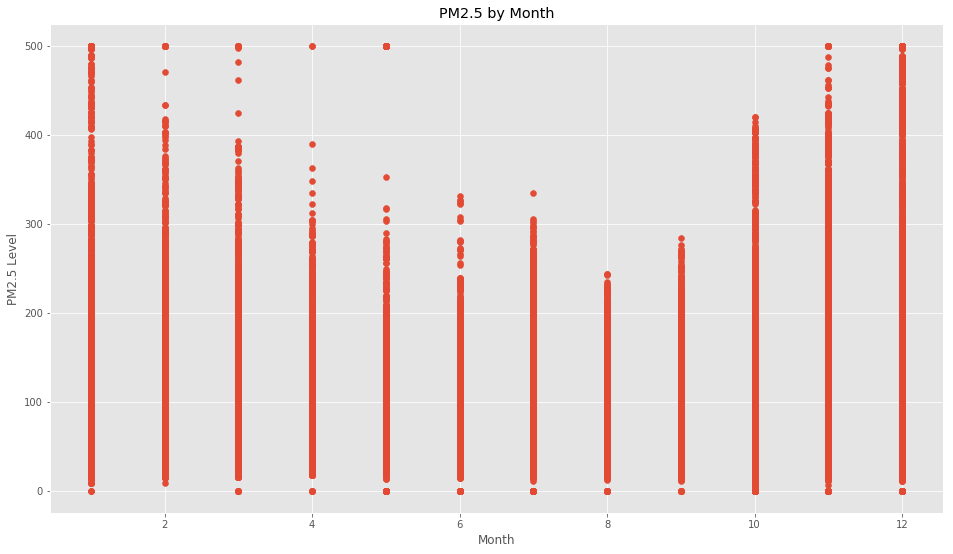

In [18]:
x = df['month']
y = df['aqi']
plt.scatter(x,y)
plt.xlabel('Month')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by Month')
plt.show()

Looking at the value plot by hour you can see there are two spikes each day, one between 9-11AM and the other starting around 20 and continuing through the night until 4.

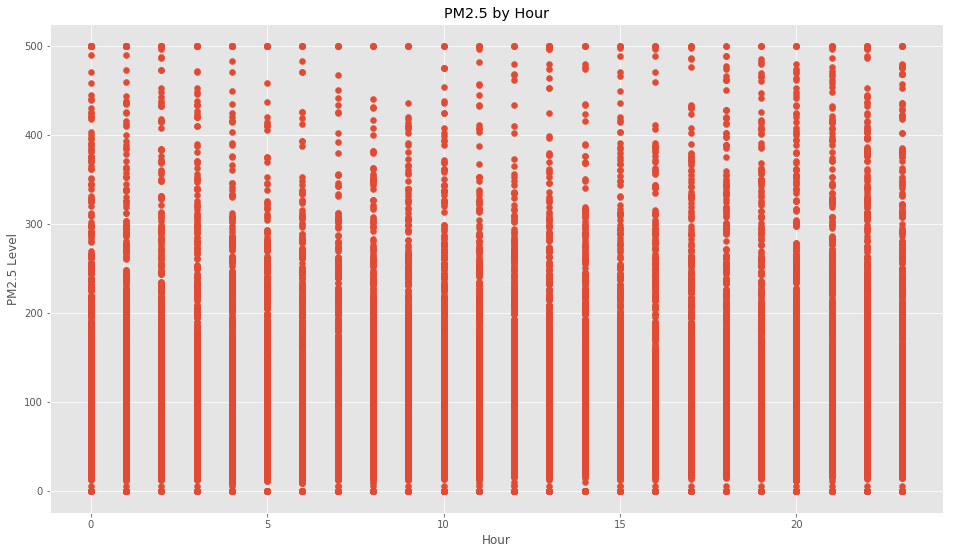

In [19]:
x = df['hour']
y = df['aqi']
plt.scatter(x,y)
plt.xlabel('Hour')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by Hour')
plt.show()

At higher windspeeds you notice a big drop in the recorded PM2.5 levels. It seems wind speed may be a good feature to predict PM2.5.

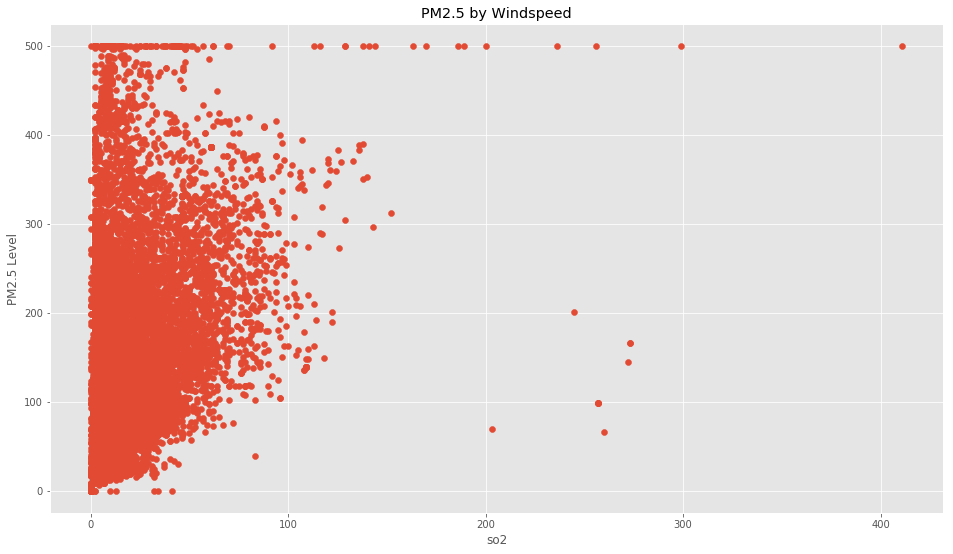

In [20]:
x = df['so2']
y = df['aqi']
plt.scatter(x,y)
plt.xlabel('so2')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by Windspeed')
plt.show()

In [45]:
from datetime import datetime

df['date'] = pd.to_datetime(df['date'])

In [46]:
df.head()

,date,aqi,so2,so2_24h,no2,no2_24h,co,co_24h,o3,o3_24h,o3_8h,o3_8h_24h,pm10,pm10_24h,pm2_5,pm2_5_24h,month,day,hour
0,2014-05-02 01:00:00,32,4,20,10,31,0.4,0.904,71,206,77,175,30,171,22,112,5,2,1
1,2014-05-02 02:00:00,26,4,20,10,30,0.4,0.883,70,206,70,175,26,165,18,108,5,2,2
2,2014-05-02 03:00:00,35,4,19,9,29,0.4,0.867,73,206,71,175,27,158,24,105,5,2,3
3,2014-05-02 04:00:00,24,4,19,9,27,0.4,0.846,74,206,73,175,17,151,14,100,5,2,4
4,2014-05-02 05:00:00,25,4,18,8,26,0.4,0.825,79,206,73,175,20,145,17,95,5,2,5


Incidentally now that we have a properly formatted Date field we can plot a time series of PM2.5 values over the entire dataset. Considering the length of time this may be messy, but let's give it a go.

In [52]:
def time_series(start, end):
    time_series_df = df[['date', 'aqi']][(df['date'] >= start) & (df['date'] <= end)]
    x = time_series_df.date
    y = time_series_df.aqi
    plt.plot(x,y)
    plt.xlabel('Time')
    plt.ylabel('PM2.5 Value')
    plt.title('PM2.5 Time Series')
    return plt.show();

D:\anaconda\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


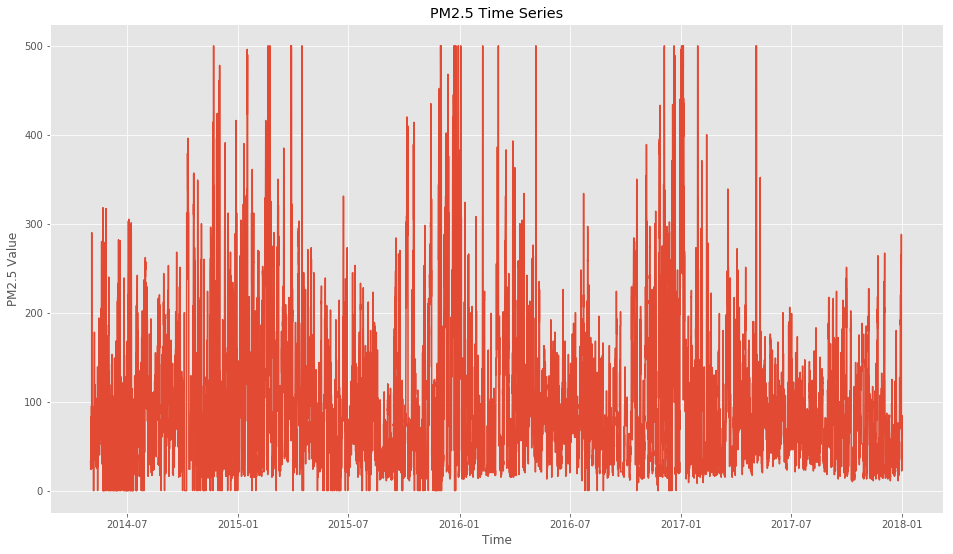

In [53]:
time_series('2014','2018')

The following graph shows a good example of outliers. These would appear to be errors in the data. In the graph above they appear in roughly the middle of the graph.

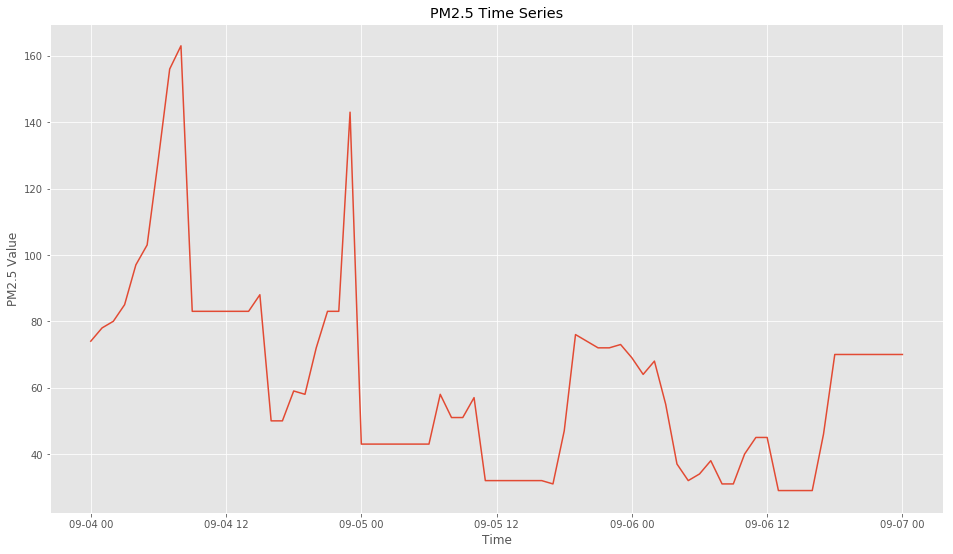

In [54]:
time_series('2016-09-04','2016-09-07')

It is quite clear that PM2.5 has a seasonal component. However it is also clear that there are outliers that are outside the normal trend. We can deal with these in the next section.

## Create previous value features

In [33]:
df.head()

,date,aqi,so2,so2_24h,no2,no2_24h,co,co_24h,o3,o3_24h,o3_8h,o3_8h_24h,pm10,pm10_24h,pm2_5,pm2_5_24h,month,day,hour
0,2014-05-02 01:00:00,32,4,20,10,31,0.4,0.904,71,206,77,175,30,171,22,112,5,2,1
1,2014-05-02 02:00:00,26,4,20,10,30,0.4,0.883,70,206,70,175,26,165,18,108,5,2,2
2,2014-05-02 03:00:00,35,4,19,9,29,0.4,0.867,73,206,71,175,27,158,24,105,5,2,3
3,2014-05-02 04:00:00,24,4,19,9,27,0.4,0.846,74,206,73,175,17,151,14,100,5,2,4
4,2014-05-02 05:00:00,25,4,18,8,26,0.4,0.825,79,206,73,175,20,145,17,95,5,2,5


In [16]:
df['Value_1'] = df.Value.shift(periods=1)
df['TEMP_1'] = df.TEMP.shift(periods=1)
df['SPD_1'] = df.SPD.shift(periods=1)
df['DEWP_1'] = df.DEWP.shift(periods=1)
df['DIR_1'] = df.DIR.shift(periods=1)
df['Value_2'] = df.Value.shift(periods=2)
df['TEMP_2'] = df.TEMP.shift(periods=2)
df['SPD_2'] = df.SPD.shift(periods=2)
df['DEWP_2'] = df.DEWP.shift(periods=2)
df['DIR_2'] = df.DIR.shift(periods=2)
df['Value_3'] = df.Value.shift(periods=3)
df['TEMP_3'] = df.TEMP.shift(periods=3)
df['SPD_3'] = df.SPD.shift(periods=3)
df['DEWP_3'] = df.DEWP.shift(periods=3)
df['DIR_3'] = df.DIR.shift(periods=3)
df['Value_4'] = df.Value.shift(periods=4)
df['TEMP_4'] = df.TEMP.shift(periods=4)
df['SPD_4'] = df.SPD.shift(periods=4)
df['DEWP_4'] = df.DEWP.shift(periods=4)
df['DIR_4'] = df.DIR.shift(periods=4)
df['Value_5'] = df.Value.shift(periods=5)
df['TEMP_5'] = df.TEMP.shift(periods=5)
df['SPD_5'] = df.SPD.shift(periods=5)
df['DEWP_5'] = df.DEWP.shift(periods=5)
df['DIR_5'] = df.DIR.shift(periods=5)

In [55]:
df.head(10)

,date,aqi,so2,so2_24h,no2,no2_24h,co,co_24h,o3,o3_24h,o3_8h,o3_8h_24h,pm10,pm10_24h,pm2_5,pm2_5_24h,month,day,hour
0,2014-05-02 01:00:00,32,4,20,10,31,0.4,0.904,71,206,77,175,30,171,22,112,5,2,1
1,2014-05-02 02:00:00,26,4,20,10,30,0.4,0.883,70,206,70,175,26,165,18,108,5,2,2
2,2014-05-02 03:00:00,35,4,19,9,29,0.4,0.867,73,206,71,175,27,158,24,105,5,2,3
3,2014-05-02 04:00:00,24,4,19,9,27,0.4,0.846,74,206,73,175,17,151,14,100,5,2,4
4,2014-05-02 05:00:00,25,4,18,8,26,0.4,0.825,79,206,73,175,20,145,17,95,5,2,5
5,2014-05-02 06:00:00,29,3,18,7,25,0.3,0.796,90,206,75,175,15,138,12,90,5,2,6
6,2014-05-02 07:00:00,32,2,18,9,23,0.2,0.758,101,206,79,175,27,130,10,84,5,2,7
7,2014-05-02 08:00:00,83,5,17,10,21,0.3,0.721,92,206,81,175,64,123,61,80,5,2,8
8,2014-05-02 09:00:00,50,4,16,12,19,0.3,0.683,86,206,83,175,50,115,27,75,5,2,9
9,2014-05-02 10:00:00,66,4,15,12,17,0.3,0.646,92,206,86,175,82,108,23,69,5,2,10


In [56]:
# Select the time frame from the graph above
df[['date', 'aqi']][(df['date'] >= '2017-09-05 01') & (df['date'] <= '2017-09-06 04')]

,date,aqi
29328,2017-09-05 01:00:00,92
29329,2017-09-05 02:00:00,104
29330,2017-09-05 03:00:00,109
29331,2017-09-05 04:00:00,117
29332,2017-09-05 05:00:00,117
29333,2017-09-05 06:00:00,117
29334,2017-09-05 07:00:00,119
29335,2017-09-05 08:00:00,135
29336,2017-09-05 09:00:00,100
29337,2017-09-05 10:00:00,52


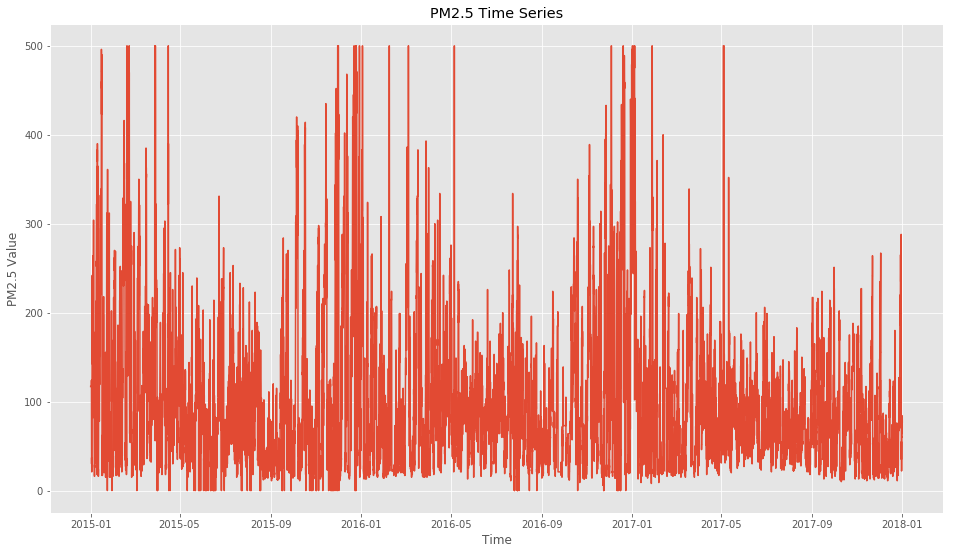

In [57]:
time_series('2015','2018')

In [64]:
df = df[df.aqi <= .6]

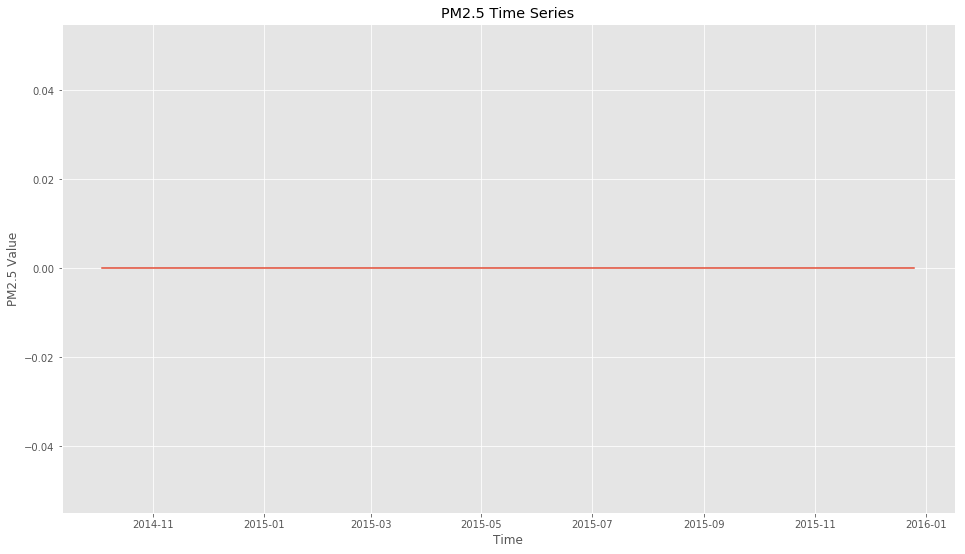

In [63]:
time_series('2014-10','2016-2')

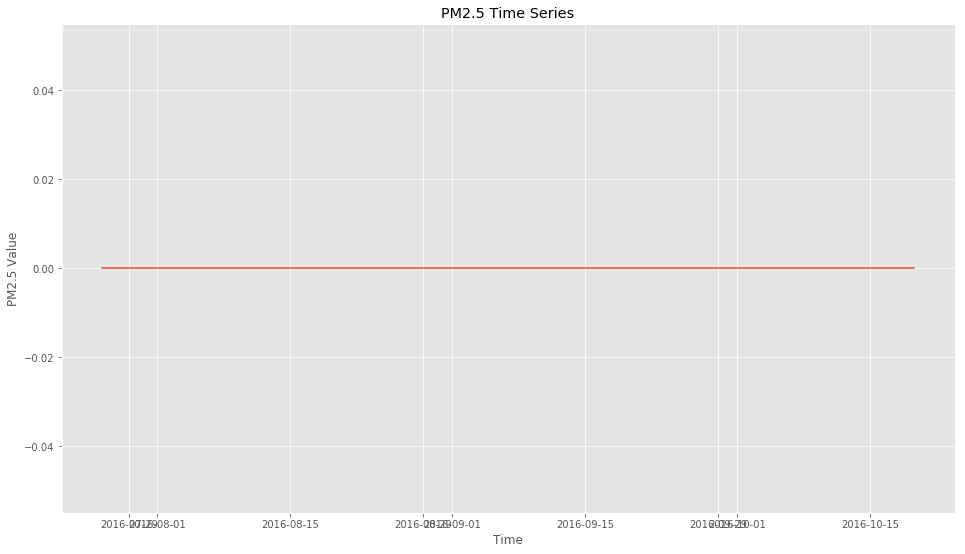

In [62]:
time_series('2016','2016-10-20')

In [65]:
print("Shape before: ", df.shape)
df = df[df.date > '2015-10-20 01']
# Check shape again to confirm
print("Shape after: ", df.shape)

Shape before:  (562, 19)
Shape after:  (88, 19)


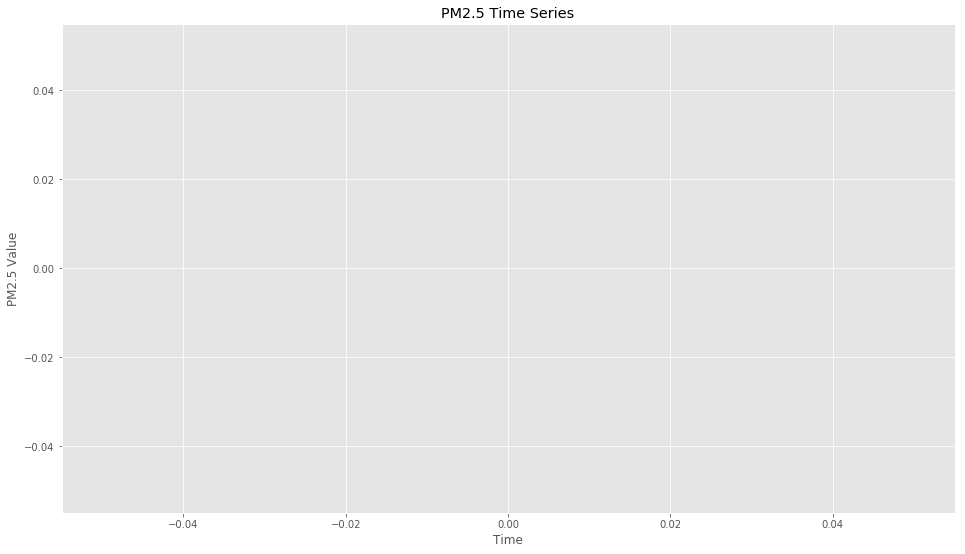

In [68]:
time_series('2016-6-01','2016-7-01')

After removing these outliers let's take a look at the full time series plot one more time.

In [34]:
time_series('2015','2018-02')

AttributeError: 'DataFrame' object has no attribute 'Date'

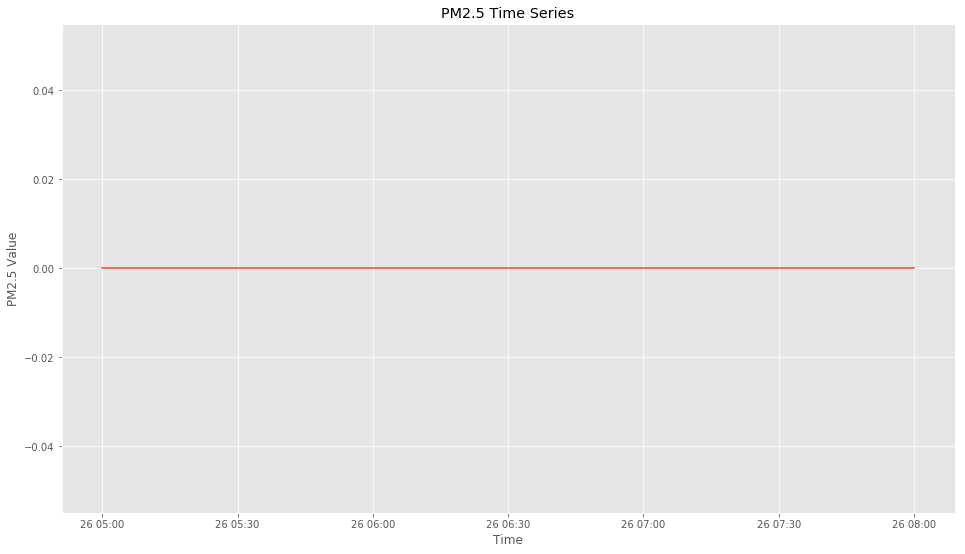

In [69]:
time_series('2016-07-20','2016-07-30')

In [70]:
df.head()

,date,aqi,so2,so2_24h,no2,no2_24h,co,co_24h,o3,o3_24h,o3_8h,o3_8h_24h,pm10,pm10_24h,pm2_5,pm2_5_24h,month,day,hour
12952,2015-10-23 17:00:00,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0,0,10,23,17
12997,2015-10-25 14:00:00,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0,0,10,25,14
13019,2015-10-26 12:00:00,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0,0,10,26,12
13020,2015-10-26 13:00:00,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0,0,10,26,13
13021,2015-10-26 14:00:00,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0,0,10,26,14


## Handle NaNs

In [28]:
# Are there null values in our dataset?
df.isnull().values.any()

True

In [29]:
df.describe()

,Month,Hour,Value,DIR,SPD,TEMP,DEWP,Value_1,TEMP_1,SPD_1,...,Value_4,TEMP_4,SPD_4,DEWP_4,DIR_4,Value_5,TEMP_5,SPD_5,DEWP_5,DIR_5
count,18558.000000,18558.000000,18558.000000,14525.000000,16810.000000,18448.000000,18445.000000,18190.000000,18447.000000,16810.000000,...,17881.000000,18447.000000,16792.000000,18446.000000,14561.000000,17852.000000,18447.000000,16793.000000,18446.000000,14568.000000
mean,6.698890,11.572206,0.070977,592.627194,5.557704,27.140178,12.865329,0.068499,27.131403,5.562582,...,0.068811,27.138668,5.573547,12.854440,591.098826,0.069227,27.174934,5.577324,12.884094,590.302718
std,3.635456,6.884253,0.096862,390.736048,5.222690,30.642773,24.492980,0.097777,30.647276,5.218725,...,0.101536,30.640746,5.212803,24.509455,390.941033,0.102646,30.609957,5.212081,24.484280,390.904218
min,1.000000,0.000000,-0.012000,10.000000,0.000000,-42.000000,-49.000000,-0.012000,-42.000000,0.000000,...,-0.012000,-42.000000,0.000000,-49.000000,10.000000,-0.012000,-42.000000,0.000000,-49.000000,10.000000
25%,4.000000,6.000000,0.013000,220.000000,2.000000,0.000000,-7.000000,0.013000,0.000000,2.000000,...,0.013000,0.000000,2.000000,-8.000000,220.000000,0.013000,0.000000,2.000000,-7.000000,220.000000
50%,7.000000,12.000000,0.028000,350.000000,4.000000,28.000000,14.000000,0.027000,28.000000,4.000000,...,0.027000,28.000000,4.000000,14.000000,350.000000,0.027000,28.000000,4.000000,14.000000,350.000000
75%,10.000000,18.000000,0.084000,990.000000,9.000000,54.000000,32.000000,0.080000,54.000000,9.000000,...,0.077000,54.000000,9.000000,32.000000,990.000000,0.078000,54.000000,9.000000,32.000000,990.000000
max,12.000000,23.000000,0.600000,990.000000,40.000000,99.000000,64.000000,0.995000,99.000000,40.000000,...,0.995000,99.000000,40.000000,64.000000,990.000000,0.995000,99.000000,40.000000,64.000000,990.000000


In [30]:
# Show rows where any cell has a NaN
df[df.isnull().any(axis=1)].shape

(11796, 33)

In [31]:
# 1. Check if Date, Month, or Hour have NaNs
print("Date contains nulls:", df.Date.isnull().values.any())
print("Month contains nulls:", df.Month.isnull().values.any())
print("Hour contains nulls:", df.Hour.isnull().values.any())

Date contains nulls: False
Month contains nulls: False
Hour contains nulls: False


In [32]:
df.shape

(18558, 33)

In [33]:
# 2. Drop any row where Value is NaN

# Show rows where value is NaN
df[df['Value'].isnull()]

,Date,Month,Hour,Value,DIR,SPD,TEMP,DEWP,Value_1,TEMP_1,...,Value_4,TEMP_4,SPD_4,DEWP_4,DIR_4,Value_5,TEMP_5,SPD_5,DEWP_5,DIR_5


There are a total of 772 rows with NaNs in the Value column out of 14687. We can drop these.

In [34]:
df = df.dropna(axis=0,subset=['Value'])
df.shape

(18558, 33)

For the next 4 features let's explore these a bit to see if there is a pattern to the NaNs so that they can be intelligently replaced.

In [35]:
# Show rows where DIR is NaN
df[df['DIR'].isnull()].shape

(4033, 33)

In [36]:
# Show rows where SPD is NaN
df[df['SPD'].isnull()].shape

(1748, 33)

In [37]:
# Show rows where TEMP is NaN
df[df['TEMP'].isnull()].shape

(110, 33)

In [38]:
# Show rows where DEWP is NaN
df[df['DEWP'].isnull()].shape

(113, 33)

In [39]:
# Show rows where DEWP & TEMP is NaN
df[df['DEWP'].isnull() & df['TEMP'].isnull()].head(20)

,Date,Month,Hour,Value,DIR,SPD,TEMP,DEWP,Value_1,TEMP_1,...,Value_4,TEMP_4,SPD_4,DEWP_4,DIR_4,Value_5,TEMP_5,SPD_5,DEWP_5,DIR_5
1065,2015-12-04 19:00:00,12,19,0.108,NaN,NaN,NaN,NaN,0.069,-11.0,...,0.055,-15.0,0.0,-2.0,NaN,0.067,-6.0,0.0,-9.0,NaN
1119,2015-12-07 01:00:00,12,1,0.336,NaN,NaN,NaN,NaN,NaN,7.0,...,0.464,-9.0,2.0,-15.0,990.0,0.396,-11.0,2.0,-17.0,990.0
1146,2015-12-09 11:00:00,12,11,0.267,170.0,7.0,NaN,NaN,0.525,-11.0,...,0.163,0.0,2.0,-6.0,990.0,0.130,1.0,4.0,2.0,180.0
1170,2015-12-10 19:00:00,12,19,0.030,NaN,NaN,NaN,NaN,0.038,5.0,...,0.038,14.0,NaN,3.0,NaN,0.037,12.0,7.0,1.0,140.0
1507,2015-12-24 20:00:00,12,20,0.202,NaN,NaN,NaN,NaN,0.160,-17.0,...,0.078,-18.0,2.0,-26.0,990.0,0.073,-24.0,2.0,-29.0,990.0
2151,2016-01-20 22:00:00,1,22,0.097,NaN,NaN,NaN,NaN,0.130,-33.0,...,0.027,-33.0,NaN,-42.0,NaN,0.035,-31.0,4.0,-38.0,990.0
2321,2016-01-28 01:00:00,1,1,0.220,990.0,2.0,NaN,NaN,0.254,-33.0,...,NaN,-18.0,4.0,-35.0,320.0,0.121,-27.0,0.0,-35.0,NaN
2479,2016-02-03 16:00:00,2,16,0.081,NaN,NaN,NaN,NaN,0.138,-6.0,...,NaN,-2.0,NaN,-11.0,NaN,NaN,-15.0,4.0,-20.0,990.0
2480,2016-02-03 17:00:00,2,17,0.061,NaN,NaN,NaN,NaN,0.081,NaN,...,0.247,-11.0,2.0,-17.0,990.0,NaN,-2.0,NaN,-11.0,NaN
2482,2016-02-03 19:00:00,2,19,0.052,NaN,NaN,NaN,NaN,0.050,-10.0,...,0.138,-6.0,NaN,-10.0,NaN,0.194,-15.0,2.0,-18.0,990.0


In [40]:
# Show rows where DEWP & TEMP & DIR is NaN
df[df['DEWP'].isnull() & df['TEMP'].isnull() & df['DIR'].isnull()].head(20)

,Date,Month,Hour,Value,DIR,SPD,TEMP,DEWP,Value_1,TEMP_1,...,Value_4,TEMP_4,SPD_4,DEWP_4,DIR_4,Value_5,TEMP_5,SPD_5,DEWP_5,DIR_5
1065,2015-12-04 19:00:00,12,19,0.108,NaN,NaN,NaN,NaN,0.069,-11.0,...,0.055,-15.0,0.0,-2.0,NaN,0.067,-6.0,0.0,-9.0,NaN
1119,2015-12-07 01:00:00,12,1,0.336,NaN,NaN,NaN,NaN,NaN,7.0,...,0.464,-9.0,2.0,-15.0,990.0,0.396,-11.0,2.0,-17.0,990.0
1170,2015-12-10 19:00:00,12,19,0.030,NaN,NaN,NaN,NaN,0.038,5.0,...,0.038,14.0,NaN,3.0,NaN,0.037,12.0,7.0,1.0,140.0
1507,2015-12-24 20:00:00,12,20,0.202,NaN,NaN,NaN,NaN,0.160,-17.0,...,0.078,-18.0,2.0,-26.0,990.0,0.073,-24.0,2.0,-29.0,990.0
2151,2016-01-20 22:00:00,1,22,0.097,NaN,NaN,NaN,NaN,0.130,-33.0,...,0.027,-33.0,NaN,-42.0,NaN,0.035,-31.0,4.0,-38.0,990.0
2479,2016-02-03 16:00:00,2,16,0.081,NaN,NaN,NaN,NaN,0.138,-6.0,...,NaN,-2.0,NaN,-11.0,NaN,NaN,-15.0,4.0,-20.0,990.0
2480,2016-02-03 17:00:00,2,17,0.061,NaN,NaN,NaN,NaN,0.081,NaN,...,0.247,-11.0,2.0,-17.0,990.0,NaN,-2.0,NaN,-11.0,NaN
2482,2016-02-03 19:00:00,2,19,0.052,NaN,NaN,NaN,NaN,0.050,-10.0,...,0.138,-6.0,NaN,-10.0,NaN,0.194,-15.0,2.0,-18.0,990.0
2483,2016-02-03 20:00:00,2,20,0.064,NaN,NaN,NaN,NaN,0.052,NaN,...,0.081,NaN,NaN,NaN,NaN,0.138,-6.0,NaN,-10.0,NaN
2764,2016-02-15 14:00:00,2,14,0.018,NaN,NaN,NaN,NaN,0.023,1.0,...,0.042,10.0,7.0,-2.0,300.0,0.027,16.0,13.0,-3.0,990.0


Considering the very small number of rows in DEWP and TEMP that have NaNs we can safely drop them. We will only lose 24 records from the data.

In [41]:
df = df.dropna(axis=0,subset=['DEWP', 'TEMP'])
df.shape

(18438, 33)

In [42]:
df[df.DIR == 990].head(10)

,Date,Month,Hour,Value,DIR,SPD,TEMP,DEWP,Value_1,TEMP_1,...,Value_4,TEMP_4,SPD_4,DEWP_4,DIR_4,Value_5,TEMP_5,SPD_5,DEWP_5,DIR_5
53,2015-10-20 05:00:00,10,5,0.032,990.0,4.0,41.0,23.0,0.048,30.0,...,0.021,28.0,2.0,16.0,990.0,0.103,28.0,NaN,27.0,NaN
54,2015-10-20 08:00:00,10,8,0.071,990.0,11.0,39.0,30.0,0.032,41.0,...,0.084,18.0,2.0,10.0,990.0,0.021,28.0,2.0,16.0,990.0
55,2015-10-20 09:00:00,10,9,0.158,990.0,16.0,40.0,29.0,0.071,39.0,...,0.061,18.0,NaN,15.0,NaN,0.084,18.0,2.0,10.0,990.0
56,2015-10-20 10:00:00,10,10,0.052,990.0,7.0,36.0,32.0,0.158,40.0,...,0.048,30.0,0.0,16.0,NaN,0.061,18.0,NaN,15.0,NaN
57,2015-10-20 11:00:00,10,11,0.039,990.0,2.0,34.0,30.0,0.052,36.0,...,0.032,41.0,4.0,23.0,990.0,0.048,30.0,0.0,16.0,NaN
59,2015-10-20 13:00:00,10,13,0.055,990.0,4.0,25.0,23.0,0.055,28.0,...,0.158,40.0,16.0,29.0,990.0,0.071,39.0,11.0,30.0,990.0
62,2015-10-20 16:00:00,10,16,0.023,990.0,2.0,21.0,18.0,0.019,23.0,...,0.055,28.0,NaN,25.0,NaN,0.039,34.0,2.0,30.0,990.0
65,2015-10-20 19:00:00,10,19,0.029,990.0,2.0,18.0,14.0,0.028,16.0,...,0.019,23.0,NaN,21.0,NaN,0.023,23.0,4.0,19.0,190.0
68,2015-10-20 22:00:00,10,22,0.095,990.0,2.0,12.0,10.0,0.133,14.0,...,0.028,16.0,NaN,14.0,NaN,0.026,18.0,0.0,16.0,NaN
71,2015-10-21 01:00:00,10,1,0.000,990.0,2.0,21.0,19.0,0.116,16.0,...,0.133,14.0,NaN,12.0,NaN,0.146,16.0,0.0,14.0,NaN


In [43]:
df.describe()

,Month,Hour,Value,DIR,SPD,TEMP,DEWP,Value_1,TEMP_1,SPD_1,...,Value_4,TEMP_4,SPD_4,DEWP_4,DIR_4,Value_5,TEMP_5,SPD_5,DEWP_5,DIR_5
count,18438.000000,18438.000000,18438.000000,14503.000000,16785.000000,18438.000000,18438.000000,18073.000000,18379.000000,16756.000000,...,17769.000000,18357.000000,16717.000000,18356.000000,14505.000000,17739.000000,18353.000000,16715.000000,18352.000000,14503.000000
mean,6.698774,11.572405,0.070777,592.623595,5.555913,27.167806,12.877969,0.068297,27.171174,5.565588,...,0.068611,27.187394,5.582581,12.894367,590.584626,0.069072,27.231733,5.585522,12.930253,589.863477
std,3.631632,6.880924,0.096718,390.725368,5.215447,30.627112,24.487431,0.097631,30.619383,5.218216,...,0.101471,30.619881,5.215592,24.491421,390.911895,0.102641,30.590374,5.214718,24.464221,390.870291
min,1.000000,0.000000,-0.012000,10.000000,0.000000,-42.000000,-49.000000,-0.012000,-42.000000,0.000000,...,-0.012000,-42.000000,0.000000,-49.000000,10.000000,-0.012000,-42.000000,0.000000,-49.000000,10.000000
25%,4.000000,6.000000,0.013000,220.000000,2.000000,0.000000,-7.000000,0.013000,0.000000,2.000000,...,0.013000,0.000000,2.000000,-8.000000,220.000000,0.013000,0.000000,2.000000,-7.000000,220.000000
50%,7.000000,12.000000,0.028000,350.000000,4.000000,28.000000,14.000000,0.027000,28.000000,4.000000,...,0.027000,28.000000,4.000000,14.000000,350.000000,0.027000,28.000000,4.000000,14.000000,350.000000
75%,10.000000,18.000000,0.084000,990.000000,9.000000,54.000000,32.000000,0.079000,54.000000,9.000000,...,0.077000,54.000000,9.000000,32.000000,990.000000,0.077000,54.000000,9.000000,32.000000,990.000000
max,12.000000,23.000000,0.600000,990.000000,40.000000,99.000000,64.000000,0.995000,99.000000,40.000000,...,0.995000,99.000000,40.000000,64.000000,990.000000,0.995000,99.000000,40.000000,64.000000,990.000000


In [44]:
#df['DIR'] = df.DIR.fillna(method='ffill')
#df['DIR_1'] = df.DIR_1.fillna(method='ffill')
#df['DIR_2'] = df.DIR_2.fillna(method='ffill')
#df['DIR_3'] = df.DIR_3.fillna(method='ffill')
#df['SPD'] = df.SPD.fillna(value=0)
#df['SPD_1'] = df.SPD_1.fillna(value=0)
#df['SPD_2'] = df.SPD_2.fillna(value=0)
#df['SPD_3'] = df.SPD_3.fillna(value=0)

Using the forward fill method of filling built into Pandas is very convenient. Let's check to make sure we have all of the rows filled properly.

In [45]:
df.describe()

,Month,Hour,Value,DIR,SPD,TEMP,DEWP,Value_1,TEMP_1,SPD_1,...,Value_4,TEMP_4,SPD_4,DEWP_4,DIR_4,Value_5,TEMP_5,SPD_5,DEWP_5,DIR_5
count,18438.000000,18438.000000,18438.000000,14503.000000,16785.000000,18438.000000,18438.000000,18073.000000,18379.000000,16756.000000,...,17769.000000,18357.000000,16717.000000,18356.000000,14505.000000,17739.000000,18353.000000,16715.000000,18352.000000,14503.000000
mean,6.698774,11.572405,0.070777,592.623595,5.555913,27.167806,12.877969,0.068297,27.171174,5.565588,...,0.068611,27.187394,5.582581,12.894367,590.584626,0.069072,27.231733,5.585522,12.930253,589.863477
std,3.631632,6.880924,0.096718,390.725368,5.215447,30.627112,24.487431,0.097631,30.619383,5.218216,...,0.101471,30.619881,5.215592,24.491421,390.911895,0.102641,30.590374,5.214718,24.464221,390.870291
min,1.000000,0.000000,-0.012000,10.000000,0.000000,-42.000000,-49.000000,-0.012000,-42.000000,0.000000,...,-0.012000,-42.000000,0.000000,-49.000000,10.000000,-0.012000,-42.000000,0.000000,-49.000000,10.000000
25%,4.000000,6.000000,0.013000,220.000000,2.000000,0.000000,-7.000000,0.013000,0.000000,2.000000,...,0.013000,0.000000,2.000000,-8.000000,220.000000,0.013000,0.000000,2.000000,-7.000000,220.000000
50%,7.000000,12.000000,0.028000,350.000000,4.000000,28.000000,14.000000,0.027000,28.000000,4.000000,...,0.027000,28.000000,4.000000,14.000000,350.000000,0.027000,28.000000,4.000000,14.000000,350.000000
75%,10.000000,18.000000,0.084000,990.000000,9.000000,54.000000,32.000000,0.079000,54.000000,9.000000,...,0.077000,54.000000,9.000000,32.000000,990.000000,0.077000,54.000000,9.000000,32.000000,990.000000
max,12.000000,23.000000,0.600000,990.000000,40.000000,99.000000,64.000000,0.995000,99.000000,40.000000,...,0.995000,99.000000,40.000000,64.000000,990.000000,0.995000,99.000000,40.000000,64.000000,990.000000


In [46]:
df = df.dropna(axis=0)

In [47]:
df.head()

,Date,Month,Hour,Value,DIR,SPD,TEMP,DEWP,Value_1,TEMP_1,...,Value_4,TEMP_4,SPD_4,DEWP_4,DIR_4,Value_5,TEMP_5,SPD_5,DEWP_5,DIR_5
76,2015-10-21 06:00:00,10,6,0.056,990.0,9.0,45.0,18.0,0.068,37.0,...,0.077,23.0,2.0,21.0,990.0,0.000,21.0,2.0,19.0,990.0
77,2015-10-21 07:00:00,10,7,0.063,240.0,13.0,46.0,16.0,0.056,45.0,...,0.058,25.0,4.0,23.0,80.0,0.077,23.0,2.0,21.0,990.0
78,2015-10-21 08:00:00,10,8,0.059,240.0,13.0,48.0,14.0,0.063,46.0,...,0.056,28.0,2.0,27.0,990.0,0.058,25.0,4.0,23.0,80.0
79,2015-10-21 09:00:00,10,9,0.057,240.0,13.0,46.0,14.0,0.059,48.0,...,0.068,37.0,2.0,27.0,990.0,0.056,28.0,2.0,27.0,990.0
80,2015-10-21 10:00:00,10,10,0.057,220.0,7.0,39.0,14.0,0.057,46.0,...,0.056,45.0,9.0,18.0,990.0,0.068,37.0,2.0,27.0,990.0


In [48]:
df = df.reset_index(drop=True)

In [49]:
df.dtypes

Date       datetime64[ns]
Month               int64
Hour                int64
Value             float64
DIR               float64
SPD               float64
TEMP              float64
DEWP              float64
Value_1           float64
TEMP_1            float64
SPD_1             float64
DEWP_1            float64
DIR_1             float64
Value_2           float64
TEMP_2            float64
SPD_2             float64
DEWP_2            float64
DIR_2             float64
Value_3           float64
TEMP_3            float64
SPD_3             float64
DEWP_3            float64
DIR_3             float64
Value_4           float64
TEMP_4            float64
SPD_4             float64
DEWP_4            float64
DIR_4             float64
Value_5           float64
TEMP_5            float64
SPD_5             float64
DEWP_5            float64
DIR_5             float64
dtype: object

In [50]:
df[df.DIR == 990].head(20)

,Date,Month,Hour,Value,DIR,SPD,TEMP,DEWP,Value_1,TEMP_1,...,Value_4,TEMP_4,SPD_4,DEWP_4,DIR_4,Value_5,TEMP_5,SPD_5,DEWP_5,DIR_5
0,2015-10-21 06:00:00,10,6,0.056,990.0,9.0,45.0,18.0,0.068,37.0,...,0.077,23.0,2.0,21.0,990.0,0.000,21.0,2.0,19.0,990.0
11,2015-10-23 11:00:00,10,11,0.091,990.0,4.0,34.0,14.0,0.163,39.0,...,0.114,50.0,11.0,14.0,330.0,0.059,50.0,7.0,15.0,290.0
14,2015-10-23 14:00:00,10,14,0.057,990.0,2.0,28.0,14.0,0.069,27.0,...,0.163,39.0,7.0,16.0,320.0,0.235,46.0,2.0,16.0,320.0
17,2015-10-24 17:00:00,10,17,0.012,990.0,9.0,43.0,14.0,0.011,45.0,...,0.015,45.0,25.0,14.0,140.0,0.021,46.0,9.0,14.0,70.0
22,2015-10-24 22:00:00,10,22,0.017,990.0,7.0,41.0,18.0,0.018,40.0,...,0.015,43.0,7.0,14.0,40.0,0.012,43.0,9.0,14.0,990.0
23,2015-10-24 23:00:00,10,23,0.015,990.0,4.0,41.0,18.0,0.017,41.0,...,0.012,43.0,11.0,14.0,150.0,0.015,43.0,7.0,14.0,40.0
26,2015-10-25 04:00:00,10,4,0.015,990.0,11.0,39.0,25.0,0.018,45.0,...,0.017,41.0,7.0,18.0,990.0,0.018,40.0,7.0,16.0,40.0
28,2015-10-25 06:00:00,10,6,0.016,990.0,9.0,39.0,35.0,0.013,43.0,...,0.015,45.0,16.0,16.0,160.0,0.015,41.0,4.0,18.0,990.0
35,2015-10-25 13:00:00,10,13,0.044,990.0,11.0,23.0,19.0,0.021,26.0,...,0.022,30.0,9.0,28.0,320.0,0.012,37.0,11.0,34.0,220.0
49,2015-10-26 05:00:00,10,5,0.015,990.0,7.0,25.0,12.0,0.014,23.0,...,0.016,18.0,18.0,12.0,330.0,0.015,19.0,18.0,14.0,340.0


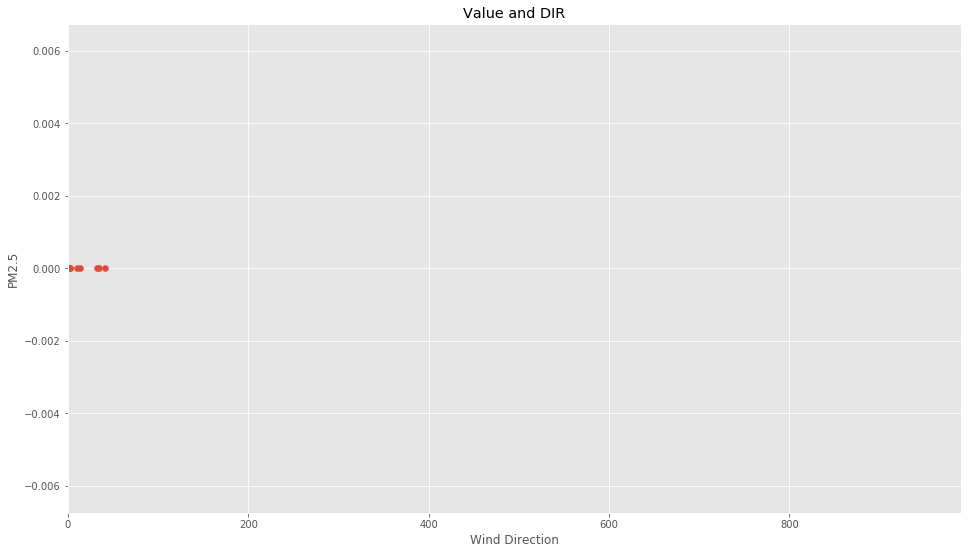

In [71]:
x = df.so2
y = df.aqi
plt.scatter(x,y)
plt.xlabel('Wind Direction')
plt.ylabel('PM2.5')
plt.title('Value and DIR')
plt.xlim(0, 990)
plt.show()

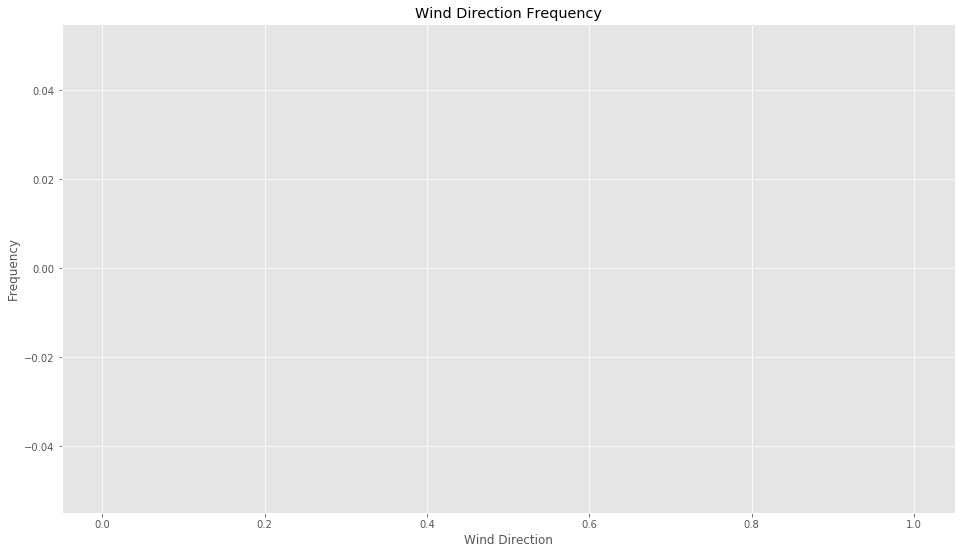

In [73]:
plt.hist(df.DIR[(df.DIR < 990) & (df.Value > .2)], 50)
plt.xlabel('Wind Direction')
plt.ylabel('Frequency')
plt.title('Wind Direction Frequency')
plt.show()

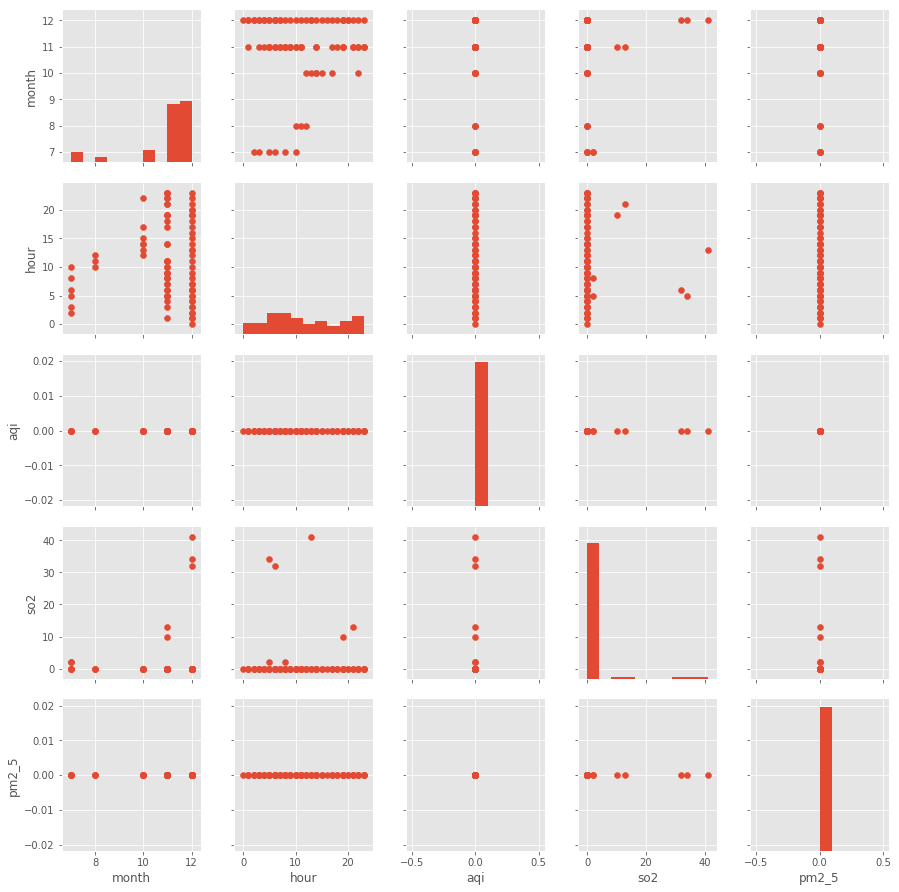

In [77]:
import seaborn as sns
g = sns.PairGrid(df, vars=["month", "hour", "aqi", "so2", "pm2_5"], dropna=True)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

D:\anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


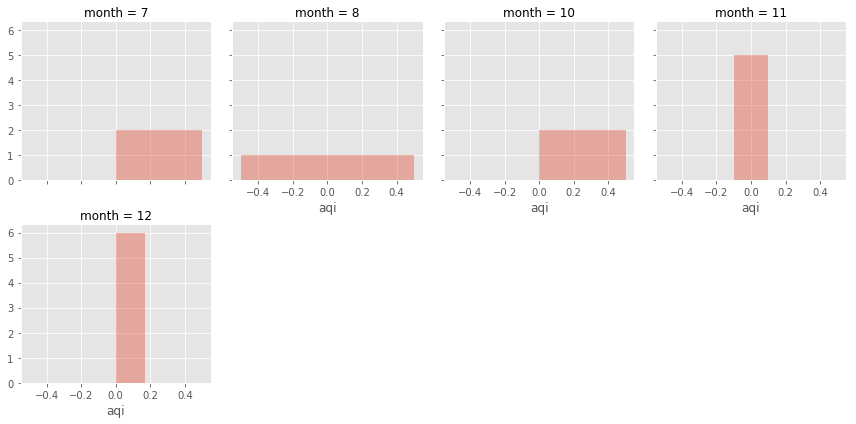

In [78]:
g = sns.FacetGrid(df, col='month', col_wrap=4)
g.map(sns.distplot, "aqi")
plt.show()

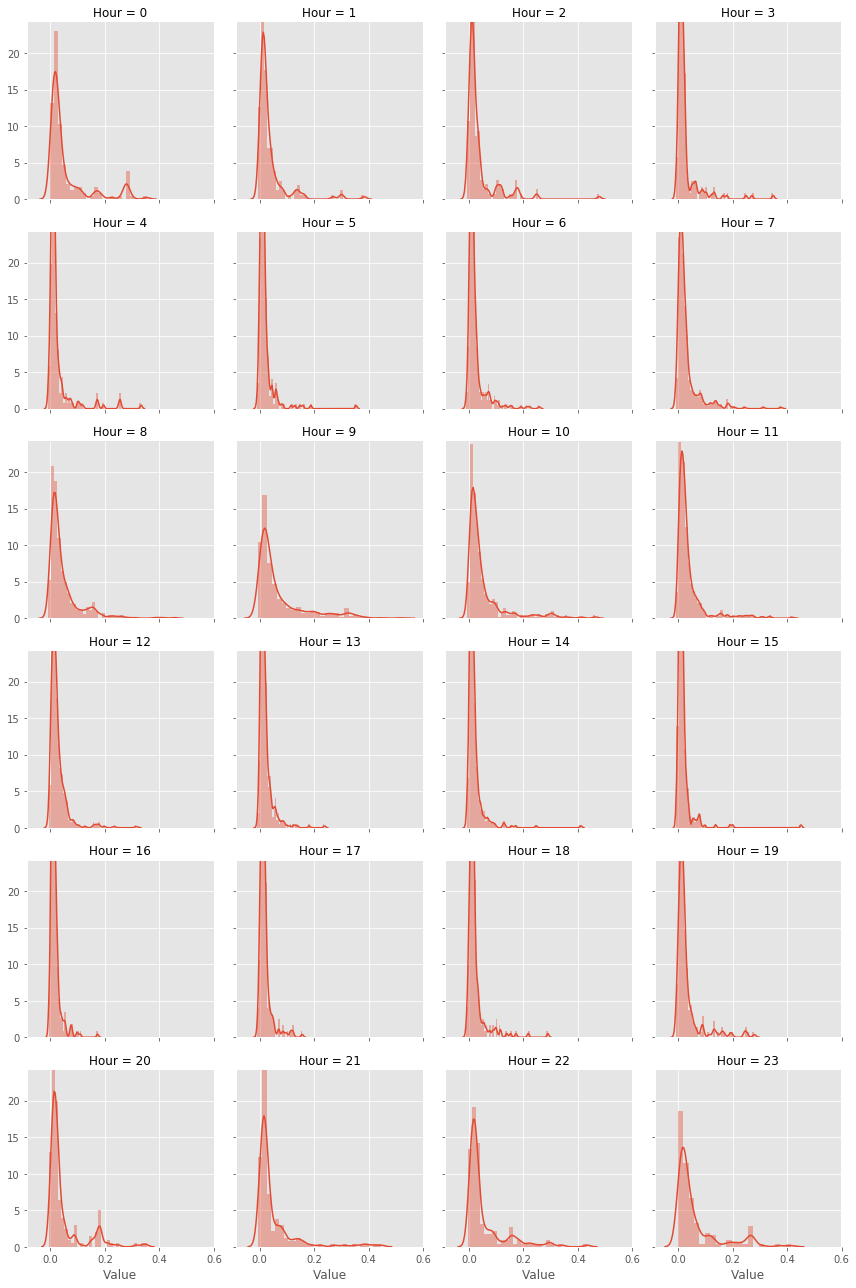

In [55]:
g = sns.FacetGrid(df, col='Hour', col_wrap=4)
g.map(sns.distplot, "Value")
plt.show()

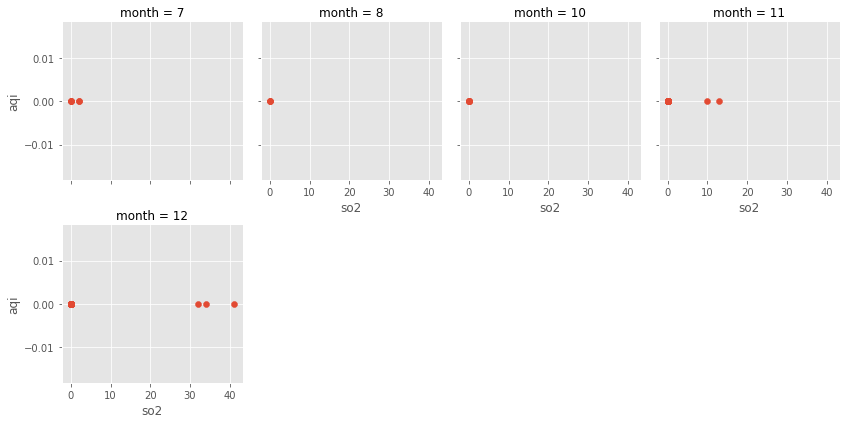

In [79]:
g = sns.FacetGrid(df, col='month', col_wrap=4)
g.map(plt.scatter, "so2","aqi")
plt.show()


In [80]:
g = sns.FacetGrid(df, col='Month', col_wrap=4)
g.map(plt.scatter, "TEMP","Value")
plt.show()

KeyError: 'Month'

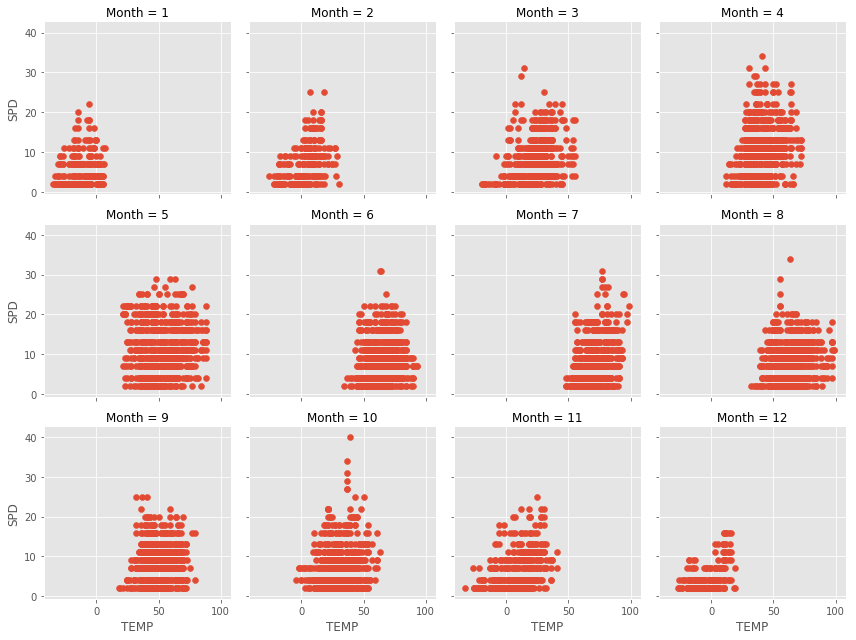

In [58]:
g = sns.FacetGrid(df, col='Month', col_wrap=4)
g.map(plt.scatter, "TEMP","SPD")
plt.show()

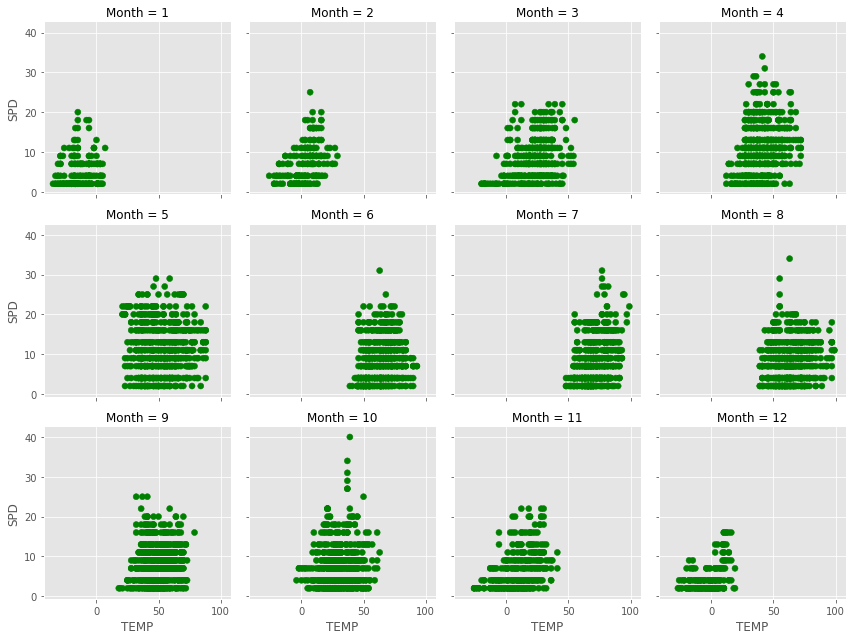

In [59]:
g = sns.FacetGrid(df, col='month', col_wrap=4)
col = np.where(df['aqi']<.1,'green',np.where(df['aqi']>.1,'None','None'))
g.map(plt.scatter, "TEMP","SPD", color=col)
plt.show()

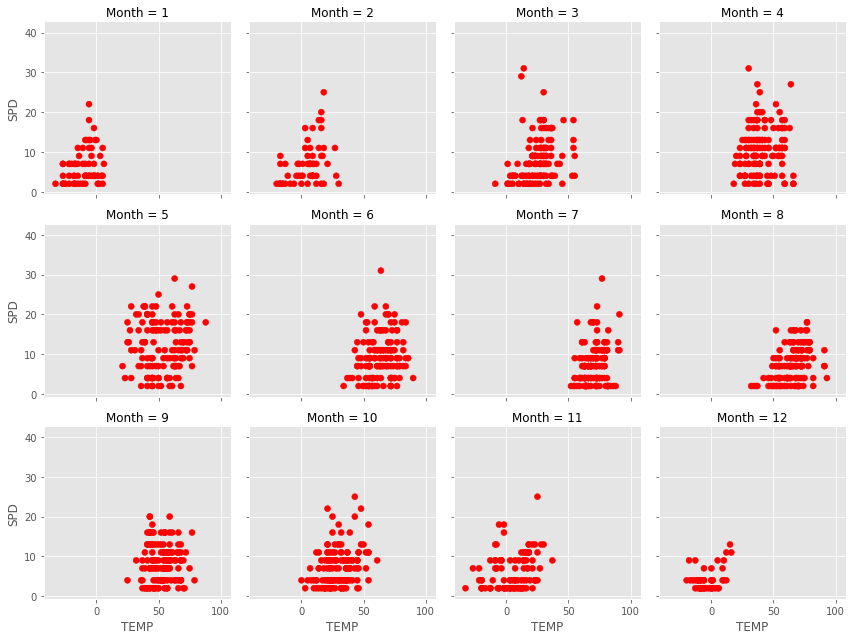

In [60]:
g = sns.FacetGrid(df, col='Month', col_wrap=4)
col = np.where(df['Value']<.1,'None',np.where(df['Value']>.1,'red','None'))
g.map(plt.scatter, "TEMP","SPD", color=col)
plt.show()

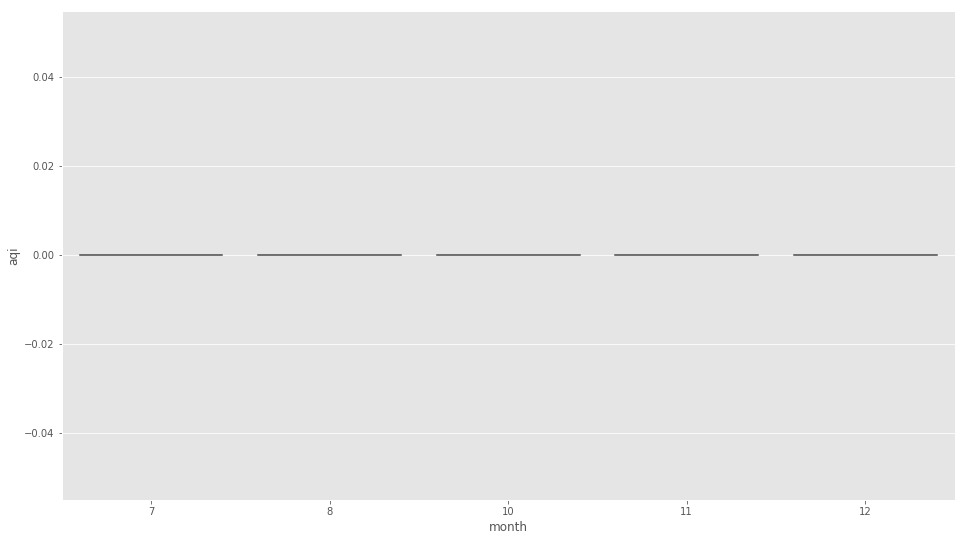

In [75]:
ax = sns.violinplot(x="month", y="aqi", data=df)

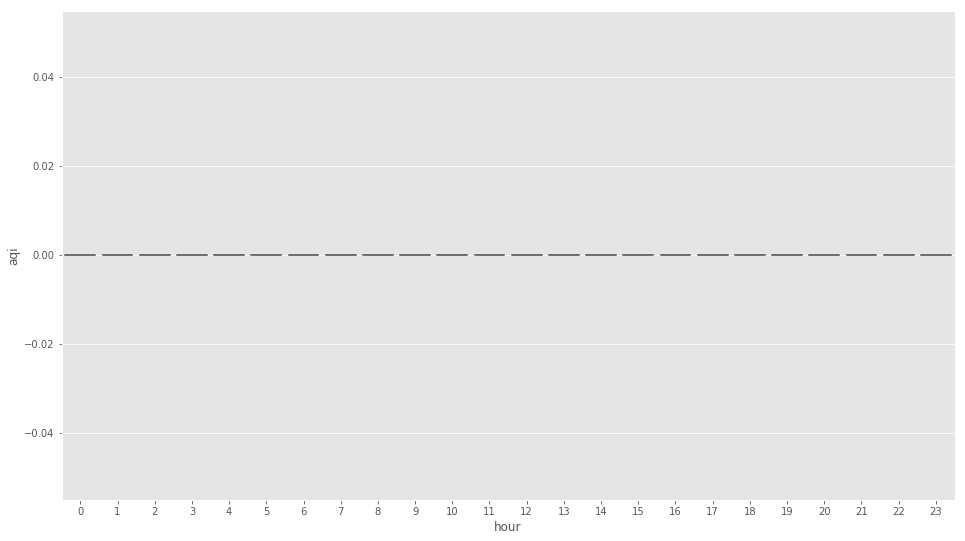

In [74]:
ax = sns.violinplot(x="hour", y="aqi", data=df)

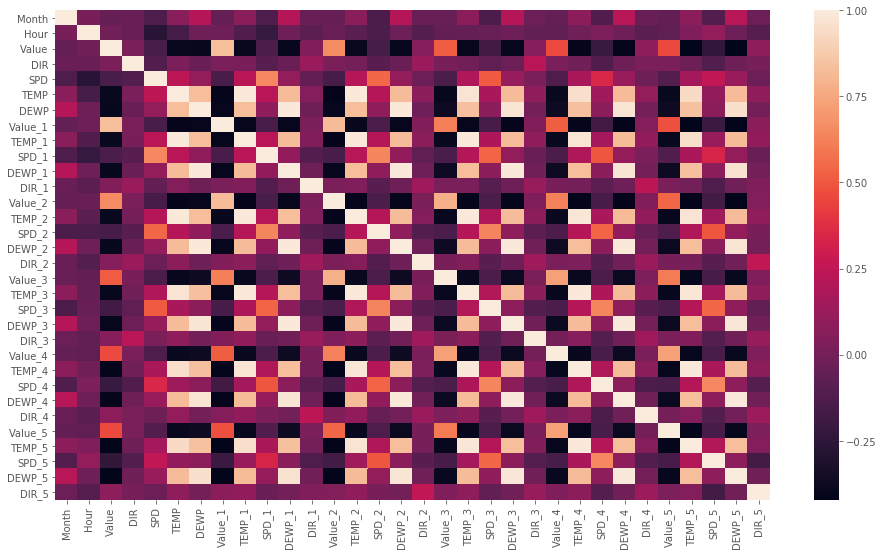

In [63]:
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [64]:
#g = sns.PairGrid(df, vars=["Month", "Hour", "Value", "DIR", "SPD", "TEMP"])
#g.map_upper(plt.scatter)
#g.map_lower(sns.kdeplot)
#g.map_diag(sns.kdeplot, lw=3, legend=False);

In [65]:
# 1 mg = 1,000 µg
df['Value'] = df.Value * 1000
df['Value_1'] = df.Value_1 * 1000
df['Value_2'] = df.Value_2 * 1000
df['Value_3'] = df.Value_3 * 1000
df['Value_4'] = df.Value_4 * 1000
df['Value_5'] = df.Value_5 * 1000

In [66]:
df.head(10)

,Date,Month,Hour,Value,DIR,SPD,TEMP,DEWP,Value_1,TEMP_1,...,Value_4,TEMP_4,SPD_4,DEWP_4,DIR_4,Value_5,TEMP_5,SPD_5,DEWP_5,DIR_5
0,2015-10-21 06:00:00,10,6,56.0,990.0,9.0,45.0,18.0,68.0,37.0,...,77.0,23.0,2.0,21.0,990.0,0.0,21.0,2.0,19.0,990.0
1,2015-10-21 07:00:00,10,7,63.0,240.0,13.0,46.0,16.0,56.0,45.0,...,58.0,25.0,4.0,23.0,80.0,77.0,23.0,2.0,21.0,990.0
2,2015-10-21 08:00:00,10,8,59.0,240.0,13.0,48.0,14.0,63.0,46.0,...,56.0,28.0,2.0,27.0,990.0,58.0,25.0,4.0,23.0,80.0
3,2015-10-21 09:00:00,10,9,57.0,240.0,13.0,46.0,14.0,59.0,48.0,...,68.0,37.0,2.0,27.0,990.0,56.0,28.0,2.0,27.0,990.0
4,2015-10-21 10:00:00,10,10,57.0,220.0,7.0,39.0,14.0,57.0,46.0,...,56.0,45.0,9.0,18.0,990.0,68.0,37.0,2.0,27.0,990.0
5,2015-10-21 11:00:00,10,11,63.0,160.0,9.0,34.0,14.0,57.0,39.0,...,63.0,46.0,13.0,16.0,240.0,56.0,45.0,9.0,18.0,990.0
6,2015-10-22 10:00:00,10,10,209.0,220.0,9.0,45.0,10.0,270.0,52.0,...,43.0,52.0,2.0,14.0,990.0,43.0,46.0,2.0,16.0,990.0
7,2015-10-22 11:00:00,10,11,40.0,160.0,4.0,36.0,9.0,209.0,45.0,...,50.0,52.0,7.0,14.0,990.0,43.0,52.0,2.0,14.0,990.0
8,2015-10-23 08:00:00,10,8,154.0,340.0,13.0,50.0,14.0,114.0,50.0,...,71.0,43.0,2.0,14.0,990.0,98.0,37.0,2.0,16.0,990.0
9,2015-10-23 09:00:00,10,9,235.0,320.0,2.0,46.0,16.0,154.0,50.0,...,43.0,48.0,4.0,16.0,990.0,71.0,43.0,2.0,14.0,990.0


## Convert cyclical & circular features



In [67]:
pd.unique(df.DIR)

array([ 990.,  240.,  220.,  160.,  340.,  320.,  180.,  130.,   30.,
        140.,   40.,  150.,  200.,  190.,  360.,  330.,   50.,  280.,
        290.,  170.,  300.,  310.,  350.,   70.,   60.,  100.,  210.,
        260.,   90.,   10.,   80.,  270.,  230.,  250.,   20.,  120.,  110.])

### Convert DIR using SIN COS method

In [68]:
#df['DIR_sin'] = np.sin(df.DIR*(2.*np.pi/360))
#df['DIR_cos'] = np.cos(df.DIR*(2.*np.pi/360))
#df['DIR_1_sin'] = np.sin(df.DIR_1*(2.*np.pi/360))
#df['DIR_1_cos'] = np.cos(df.DIR_1*(2.*np.pi/360))

In [69]:
df.head(10)

,Date,Month,Hour,Value,DIR,SPD,TEMP,DEWP,Value_1,TEMP_1,...,Value_4,TEMP_4,SPD_4,DEWP_4,DIR_4,Value_5,TEMP_5,SPD_5,DEWP_5,DIR_5
0,2015-10-21 06:00:00,10,6,56.0,990.0,9.0,45.0,18.0,68.0,37.0,...,77.0,23.0,2.0,21.0,990.0,0.0,21.0,2.0,19.0,990.0
1,2015-10-21 07:00:00,10,7,63.0,240.0,13.0,46.0,16.0,56.0,45.0,...,58.0,25.0,4.0,23.0,80.0,77.0,23.0,2.0,21.0,990.0
2,2015-10-21 08:00:00,10,8,59.0,240.0,13.0,48.0,14.0,63.0,46.0,...,56.0,28.0,2.0,27.0,990.0,58.0,25.0,4.0,23.0,80.0
3,2015-10-21 09:00:00,10,9,57.0,240.0,13.0,46.0,14.0,59.0,48.0,...,68.0,37.0,2.0,27.0,990.0,56.0,28.0,2.0,27.0,990.0
4,2015-10-21 10:00:00,10,10,57.0,220.0,7.0,39.0,14.0,57.0,46.0,...,56.0,45.0,9.0,18.0,990.0,68.0,37.0,2.0,27.0,990.0
5,2015-10-21 11:00:00,10,11,63.0,160.0,9.0,34.0,14.0,57.0,39.0,...,63.0,46.0,13.0,16.0,240.0,56.0,45.0,9.0,18.0,990.0
6,2015-10-22 10:00:00,10,10,209.0,220.0,9.0,45.0,10.0,270.0,52.0,...,43.0,52.0,2.0,14.0,990.0,43.0,46.0,2.0,16.0,990.0
7,2015-10-22 11:00:00,10,11,40.0,160.0,4.0,36.0,9.0,209.0,45.0,...,50.0,52.0,7.0,14.0,990.0,43.0,52.0,2.0,14.0,990.0
8,2015-10-23 08:00:00,10,8,154.0,340.0,13.0,50.0,14.0,114.0,50.0,...,71.0,43.0,2.0,14.0,990.0,98.0,37.0,2.0,16.0,990.0
9,2015-10-23 09:00:00,10,9,235.0,320.0,2.0,46.0,16.0,154.0,50.0,...,43.0,48.0,4.0,16.0,990.0,71.0,43.0,2.0,14.0,990.0


In [70]:
#df['DIR_cos'] = df.DIR_cos.replace(np.cos(990*(2*np.pi/360)), 0)
#df['DIR_1_cos'] = df.DIR_1_cos.replace(np.cos(990*(2*np.pi/360)), 0)

In [71]:
#df['DIR_sin'][(df.DIR_sin == -1) & (df.DIR == 990)] = 0
#df['DIR_1_sin'][(df.DIR_1_sin == -1) & (df.DIR_1 == 990)] = 0

In [72]:
#df.plot.scatter('DIR_sin','DIR_cos').set_aspect('equal')
#plt.show()

In [73]:
#df = df.drop(['DIR', 'DIR_1'], axis=1)

In [74]:
df.head(10)

,Date,Month,Hour,Value,DIR,SPD,TEMP,DEWP,Value_1,TEMP_1,...,Value_4,TEMP_4,SPD_4,DEWP_4,DIR_4,Value_5,TEMP_5,SPD_5,DEWP_5,DIR_5
0,2015-10-21 06:00:00,10,6,56.0,990.0,9.0,45.0,18.0,68.0,37.0,...,77.0,23.0,2.0,21.0,990.0,0.0,21.0,2.0,19.0,990.0
1,2015-10-21 07:00:00,10,7,63.0,240.0,13.0,46.0,16.0,56.0,45.0,...,58.0,25.0,4.0,23.0,80.0,77.0,23.0,2.0,21.0,990.0
2,2015-10-21 08:00:00,10,8,59.0,240.0,13.0,48.0,14.0,63.0,46.0,...,56.0,28.0,2.0,27.0,990.0,58.0,25.0,4.0,23.0,80.0
3,2015-10-21 09:00:00,10,9,57.0,240.0,13.0,46.0,14.0,59.0,48.0,...,68.0,37.0,2.0,27.0,990.0,56.0,28.0,2.0,27.0,990.0
4,2015-10-21 10:00:00,10,10,57.0,220.0,7.0,39.0,14.0,57.0,46.0,...,56.0,45.0,9.0,18.0,990.0,68.0,37.0,2.0,27.0,990.0
5,2015-10-21 11:00:00,10,11,63.0,160.0,9.0,34.0,14.0,57.0,39.0,...,63.0,46.0,13.0,16.0,240.0,56.0,45.0,9.0,18.0,990.0
6,2015-10-22 10:00:00,10,10,209.0,220.0,9.0,45.0,10.0,270.0,52.0,...,43.0,52.0,2.0,14.0,990.0,43.0,46.0,2.0,16.0,990.0
7,2015-10-22 11:00:00,10,11,40.0,160.0,4.0,36.0,9.0,209.0,45.0,...,50.0,52.0,7.0,14.0,990.0,43.0,52.0,2.0,14.0,990.0
8,2015-10-23 08:00:00,10,8,154.0,340.0,13.0,50.0,14.0,114.0,50.0,...,71.0,43.0,2.0,14.0,990.0,98.0,37.0,2.0,16.0,990.0
9,2015-10-23 09:00:00,10,9,235.0,320.0,2.0,46.0,16.0,154.0,50.0,...,43.0,48.0,4.0,16.0,990.0,71.0,43.0,2.0,14.0,990.0


In [75]:
df.columns

Index(['Date', 'Month', 'Hour', 'Value', 'DIR', 'SPD', 'TEMP', 'DEWP',
       'Value_1', 'TEMP_1', 'SPD_1', 'DEWP_1', 'DIR_1', 'Value_2', 'TEMP_2',
       'SPD_2', 'DEWP_2', 'DIR_2', 'Value_3', 'TEMP_3', 'SPD_3', 'DEWP_3',
       'DIR_3', 'Value_4', 'TEMP_4', 'SPD_4', 'DEWP_4', 'DIR_4', 'Value_5',
       'TEMP_5', 'SPD_5', 'DEWP_5', 'DIR_5'],
      dtype='object')

In [76]:
#df['hr_sin'] = np.sin(df.Hour*(2.*np.pi/24))
#df['hr_cos'] = np.cos(df.Hour*(2.*np.pi/24))
#df['month_sin'] = np.sin((df.Month-1)*(2.*np.pi/12))
#df['month_cos'] = np.cos((df.Month-1)*(2.*np.pi/12))

Visualizing the features we created we can see they are now circular instead of linear. 

In [77]:
#df.plot.scatter('hr_sin','hr_cos').set_aspect('equal')
#df.plot.scatter('month_sin','month_cos').set_aspect('equal')
#plt.show()

We no longer need the Month and Hour columns so we can safely drop them.

In [78]:
#df = df.drop(['Month', 'Hour'], axis=1)

In [79]:
df.head(5)

,Date,Month,Hour,Value,DIR,SPD,TEMP,DEWP,Value_1,TEMP_1,...,Value_4,TEMP_4,SPD_4,DEWP_4,DIR_4,Value_5,TEMP_5,SPD_5,DEWP_5,DIR_5
0,2015-10-21 06:00:00,10,6,56.0,990.0,9.0,45.0,18.0,68.0,37.0,...,77.0,23.0,2.0,21.0,990.0,0.0,21.0,2.0,19.0,990.0
1,2015-10-21 07:00:00,10,7,63.0,240.0,13.0,46.0,16.0,56.0,45.0,...,58.0,25.0,4.0,23.0,80.0,77.0,23.0,2.0,21.0,990.0
2,2015-10-21 08:00:00,10,8,59.0,240.0,13.0,48.0,14.0,63.0,46.0,...,56.0,28.0,2.0,27.0,990.0,58.0,25.0,4.0,23.0,80.0
3,2015-10-21 09:00:00,10,9,57.0,240.0,13.0,46.0,14.0,59.0,48.0,...,68.0,37.0,2.0,27.0,990.0,56.0,28.0,2.0,27.0,990.0
4,2015-10-21 10:00:00,10,10,57.0,220.0,7.0,39.0,14.0,57.0,46.0,...,56.0,45.0,9.0,18.0,990.0,68.0,37.0,2.0,27.0,990.0


In [80]:
# Formula to convert F to C is: [°C] = ([°F] - 32) × 5/9
df['TEMP'] = (df.TEMP - 32) * 5.0/9.0
df['TEMP_1'] = (df.TEMP_1 - 32) * 5.0/9.0
df['TEMP_2'] = (df.TEMP_2 - 32) * 5.0/9.0
df['TEMP_3'] = (df.TEMP_3 - 32) * 5.0/9.0
df['TEMP_4'] = (df.TEMP_4 - 32) * 5.0/9.0
df['TEMP_5'] = (df.TEMP_5 - 32) * 5.0/9.0

In [81]:
# Formula to convert F to C is: [°C] = ([°F] - 32) × 5/9
df['DEWP'] = (df.DEWP - 32) * 5.0/9.0
df['DEWP_1'] = (df.DEWP_1 - 32) * 5.0/9.0
df['DEWP_2'] = (df.DEWP_2 - 32) * 5.0/9.0
df['DEWP_3'] = (df.DEWP_3 - 32) * 5.0/9.0
df['DEWP_4'] = (df.DEWP_4 - 32) * 5.0/9.0
df['DEWP_5'] = (df.DEWP_5 - 32) * 5.0/9.0

In [82]:
df.head(5)

,Date,Month,Hour,Value,DIR,SPD,TEMP,DEWP,Value_1,TEMP_1,...,Value_4,TEMP_4,SPD_4,DEWP_4,DIR_4,Value_5,TEMP_5,SPD_5,DEWP_5,DIR_5
0,2015-10-21 06:00:00,10,6,56.0,990.0,9.0,7.222222,-7.777778,68.0,2.777778,...,77.0,-5.000000,2.0,-6.111111,990.0,0.0,-6.111111,2.0,-7.222222,990.0
1,2015-10-21 07:00:00,10,7,63.0,240.0,13.0,7.777778,-8.888889,56.0,7.222222,...,58.0,-3.888889,4.0,-5.000000,80.0,77.0,-5.000000,2.0,-6.111111,990.0
2,2015-10-21 08:00:00,10,8,59.0,240.0,13.0,8.888889,-10.000000,63.0,7.777778,...,56.0,-2.222222,2.0,-2.777778,990.0,58.0,-3.888889,4.0,-5.000000,80.0
3,2015-10-21 09:00:00,10,9,57.0,240.0,13.0,7.777778,-10.000000,59.0,8.888889,...,68.0,2.777778,2.0,-2.777778,990.0,56.0,-2.222222,2.0,-2.777778,990.0
4,2015-10-21 10:00:00,10,10,57.0,220.0,7.0,3.888889,-10.000000,57.0,7.777778,...,56.0,7.222222,9.0,-7.777778,990.0,68.0,2.777778,2.0,-2.777778,990.0


In [83]:
# 1 mph = 1.60934 kph
df['SPD'] = df.SPD * 1.60934
df['SPD_1'] = df.SPD_1 * 1.60934
df['SPD_2'] = df.SPD_2 * 1.60934
df['SPD_3'] = df.SPD_3 * 1.60934
df['SPD_4'] = df.SPD_4 * 1.60934
df['SPD_5'] = df.SPD_5 * 1.60934

In [84]:
df.head(5)

,Date,Month,Hour,Value,DIR,SPD,TEMP,DEWP,Value_1,TEMP_1,...,Value_4,TEMP_4,SPD_4,DEWP_4,DIR_4,Value_5,TEMP_5,SPD_5,DEWP_5,DIR_5
0,2015-10-21 06:00:00,10,6,56.0,990.0,14.48406,7.222222,-7.777778,68.0,2.777778,...,77.0,-5.000000,3.21868,-6.111111,990.0,0.0,-6.111111,3.21868,-7.222222,990.0
1,2015-10-21 07:00:00,10,7,63.0,240.0,20.92142,7.777778,-8.888889,56.0,7.222222,...,58.0,-3.888889,6.43736,-5.000000,80.0,77.0,-5.000000,3.21868,-6.111111,990.0
2,2015-10-21 08:00:00,10,8,59.0,240.0,20.92142,8.888889,-10.000000,63.0,7.777778,...,56.0,-2.222222,3.21868,-2.777778,990.0,58.0,-3.888889,6.43736,-5.000000,80.0
3,2015-10-21 09:00:00,10,9,57.0,240.0,20.92142,7.777778,-10.000000,59.0,8.888889,...,68.0,2.777778,3.21868,-2.777778,990.0,56.0,-2.222222,3.21868,-2.777778,990.0
4,2015-10-21 10:00:00,10,10,57.0,220.0,11.26538,3.888889,-10.000000,57.0,7.777778,...,56.0,7.222222,14.48406,-7.777778,990.0,68.0,2.777778,3.21868,-2.777778,990.0


In [12]:
df.dtypes

date          object
aqi            int64
so2            int64
so2_24h        int64
no2            int64
no2_24h        int64
co           float64
co_24h       float64
o3             int64
o3_24h         int64
o3_8h          int64
o3_8h_24h      int64
pm10           int64
pm10_24h       int64
pm2_5          int64
pm2_5_24h      int64
month          int64
day            int64
hour           int64
dtype: object

In [86]:
import math

df['HUM'] = 100*(np.exp((17.625 * df['DEWP'])/(243.04 + df['DEWP']))/np.exp((17.625 * df['TEMP'])/(243.04 + df['TEMP'])))
df['HUM_1'] = 100*(np.exp((17.625 * df['DEWP_1'])/(243.04 + df['DEWP_1']))/np.exp((17.625 * df['TEMP_1'])/(243.04 + df['TEMP_1'])))
df['HUM_2'] = 100*(np.exp((17.625 * df['DEWP_2'])/(243.04 + df['DEWP_2']))/np.exp((17.625 * df['TEMP_2'])/(243.04 + df['TEMP_2'])))
df['HUM_3'] = 100*(np.exp((17.625 * df['DEWP_3'])/(243.04 + df['DEWP_3']))/np.exp((17.625 * df['TEMP_3'])/(243.04 + df['TEMP_3'])))
df['HUM_4'] = 100*(np.exp((17.625 * df['DEWP_4'])/(243.04 + df['DEWP_4']))/np.exp((17.625 * df['TEMP_4'])/(243.04 + df['TEMP_4'])))
df['HUM_5'] = 100*(np.exp((17.625 * df['DEWP_5'])/(243.04 + df['DEWP_5']))/np.exp((17.625 * df['TEMP_5'])/(243.04 + df['TEMP_5'])))

In [87]:
df.head(10)

,Date,Month,Hour,Value,DIR,SPD,TEMP,DEWP,Value_1,TEMP_1,...,TEMP_5,SPD_5,DEWP_5,DIR_5,HUM,HUM_1,HUM_2,HUM_3,HUM_4,HUM_5
0,2015-10-21 06:00:00,10,6,56.0,990.0,14.48406,7.222222,-7.777778,68.0,2.777778,...,-6.111111,3.21868,-7.222222,990.0,33.577422,66.835517,95.970421,91.979277,91.907178,91.834117
1,2015-10-21 07:00:00,10,7,63.0,240.0,20.92142,7.777778,-8.888889,56.0,7.222222,...,-5.000000,3.21868,-6.111111,990.0,29.652341,33.577422,66.835517,95.970421,91.979277,91.907178
2,2015-10-21 08:00:00,10,8,59.0,240.0,20.92142,8.888889,-10.000000,63.0,7.777778,...,-3.888889,6.43736,-5.000000,80.0,25.203772,29.652341,33.577422,66.835517,95.970421,91.979277
3,2015-10-21 09:00:00,10,9,57.0,240.0,20.92142,7.777778,-10.000000,59.0,8.888889,...,-2.222222,3.21868,-2.777778,990.0,27.175525,25.203772,29.652341,33.577422,66.835517,95.970421
4,2015-10-21 10:00:00,10,10,57.0,220.0,11.26538,3.888889,-10.000000,57.0,7.777778,...,2.777778,3.21868,-2.777778,990.0,35.562287,27.175525,25.203772,29.652341,33.577422,66.835517
5,2015-10-21 11:00:00,10,11,63.0,160.0,14.48406,1.111111,-10.000000,57.0,3.888889,...,7.222222,14.48406,-7.777778,990.0,43.321644,35.562287,27.175525,25.203772,29.652341,33.577422
6,2015-10-22 10:00:00,10,10,209.0,220.0,14.48406,7.222222,-12.222222,270.0,11.111111,...,7.777778,3.21868,-8.888889,990.0,23.647588,18.198794,16.911449,21.721951,21.721951,29.652341
7,2015-10-22 11:00:00,10,11,40.0,160.0,6.43736,2.222222,-12.777778,209.0,7.222222,...,11.111111,3.21868,-10.000000,990.0,32.054115,23.647588,18.198794,16.911449,21.721951,21.721951
8,2015-10-23 08:00:00,10,8,154.0,340.0,20.92142,10.000000,-10.000000,114.0,10.000000,...,2.777778,3.21868,-8.888889,990.0,23.390549,23.390549,24.435768,27.500880,30.464468,41.968589
9,2015-10-23 09:00:00,10,9,235.0,320.0,3.21868,7.777778,-8.888889,154.0,10.000000,...,6.111111,3.21868,-10.000000,990.0,29.652341,23.390549,23.390549,24.435768,27.500880,30.464468


In [88]:
df = df.drop(['DEWP','DEWP_1', 'DEWP_2', 'DEWP_3', 'DEWP_4', 'DEWP_5'], axis=1)

In [89]:
import datetime as dt

df['day_week'] = df['Date'].dt.weekday_name

In [90]:
df.head()

,Date,Month,Hour,Value,DIR,SPD,TEMP,Value_1,TEMP_1,SPD_1,...,TEMP_5,SPD_5,DIR_5,HUM,HUM_1,HUM_2,HUM_3,HUM_4,HUM_5,day_week
0,2015-10-21 06:00:00,10,6,56.0,990.0,14.48406,7.222222,68.0,2.777778,3.21868,...,-6.111111,3.21868,990.0,33.577422,66.835517,95.970421,91.979277,91.907178,91.834117,Wednesday
1,2015-10-21 07:00:00,10,7,63.0,240.0,20.92142,7.777778,56.0,7.222222,14.48406,...,-5.000000,3.21868,990.0,29.652341,33.577422,66.835517,95.970421,91.979277,91.907178,Wednesday
2,2015-10-21 08:00:00,10,8,59.0,240.0,20.92142,8.888889,63.0,7.777778,20.92142,...,-3.888889,6.43736,80.0,25.203772,29.652341,33.577422,66.835517,95.970421,91.979277,Wednesday
3,2015-10-21 09:00:00,10,9,57.0,240.0,20.92142,7.777778,59.0,8.888889,20.92142,...,-2.222222,3.21868,990.0,27.175525,25.203772,29.652341,33.577422,66.835517,95.970421,Wednesday
4,2015-10-21 10:00:00,10,10,57.0,220.0,11.26538,3.888889,57.0,7.777778,20.92142,...,2.777778,3.21868,990.0,35.562287,27.175525,25.203772,29.652341,33.577422,66.835517,Wednesday


In [91]:
df['day_week_cat'] = df.day_week.astype("category").cat.codes

In [92]:
df.dtypes

Date            datetime64[ns]
Month                    int64
Hour                     int64
Value                  float64
DIR                    float64
SPD                    float64
TEMP                   float64
Value_1                float64
TEMP_1                 float64
SPD_1                  float64
DIR_1                  float64
Value_2                float64
TEMP_2                 float64
SPD_2                  float64
DIR_2                  float64
Value_3                float64
TEMP_3                 float64
SPD_3                  float64
DIR_3                  float64
Value_4                float64
TEMP_4                 float64
SPD_4                  float64
DIR_4                  float64
Value_5                float64
TEMP_5                 float64
SPD_5                  float64
DIR_5                  float64
HUM                    float64
HUM_1                  float64
HUM_2                  float64
HUM_3                  float64
HUM_4                  float64
HUM_5   

In [93]:
load = df[['Value', 'day_week']].groupby(['day_week']).mean()

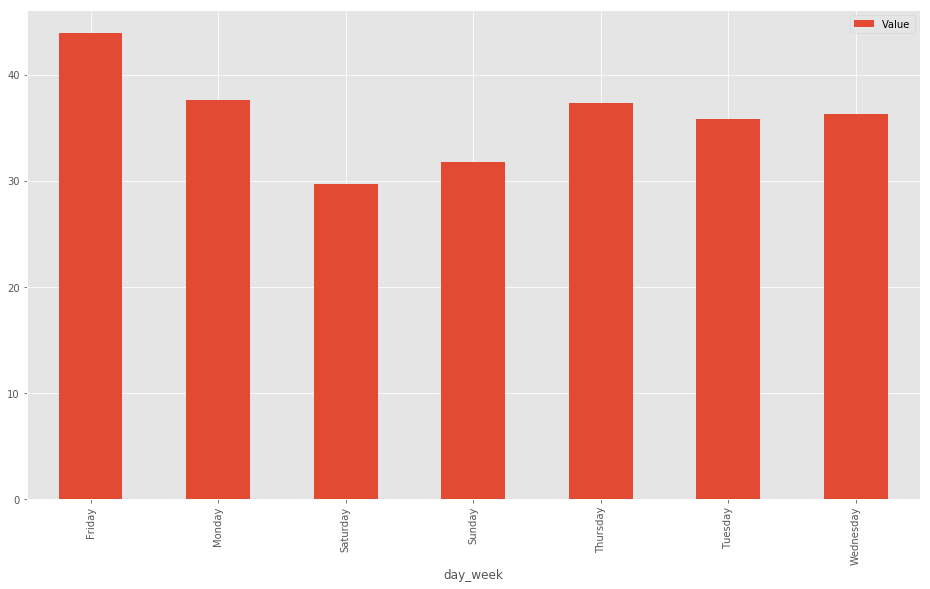

In [94]:
load.plot(kind='bar')

In [95]:
df = df.drop(labels='day_week', axis=1)

In [13]:
df.head()

,date,aqi,so2,so2_24h,no2,no2_24h,co,co_24h,o3,o3_24h,o3_8h,o3_8h_24h,pm10,pm10_24h,pm2_5,pm2_5_24h,month,day,hour
0,2014-05-02 01:00:00,32,4,20,10,31,0.4,0.904,71,206,77,175,30,171,22,112,5,2,1
1,2014-05-02 02:00:00,26,4,20,10,30,0.4,0.883,70,206,70,175,26,165,18,108,5,2,2
2,2014-05-02 03:00:00,35,4,19,9,29,0.4,0.867,73,206,71,175,27,158,24,105,5,2,3
3,2014-05-02 04:00:00,24,4,19,9,27,0.4,0.846,74,206,73,175,17,151,14,100,5,2,4
4,2014-05-02 05:00:00,25,4,18,8,26,0.4,0.825,79,206,73,175,20,145,17,95,5,2,5


In [14]:
df.head(5)

,date,aqi,so2,so2_24h,no2,no2_24h,co,co_24h,o3,o3_24h,o3_8h,o3_8h_24h,pm10,pm10_24h,pm2_5,pm2_5_24h,month,day,hour
0,2014-05-02 01:00:00,32,4,20,10,31,0.4,0.904,71,206,77,175,30,171,22,112,5,2,1
1,2014-05-02 02:00:00,26,4,20,10,30,0.4,0.883,70,206,70,175,26,165,18,108,5,2,2
2,2014-05-02 03:00:00,35,4,19,9,29,0.4,0.867,73,206,71,175,27,158,24,105,5,2,3
3,2014-05-02 04:00:00,24,4,19,9,27,0.4,0.846,74,206,73,175,17,151,14,100,5,2,4
4,2014-05-02 05:00:00,25,4,18,8,26,0.4,0.825,79,206,73,175,20,145,17,95,5,2,5


In [15]:
df = df.drop(['date'], axis=1)
df.columns

Index(['aqi', 'so2', 'so2_24h', 'no2', 'no2_24h', 'co', 'co_24h', 'o3',
       'o3_24h', 'o3_8h', 'o3_8h_24h', 'pm10', 'pm10_24h', 'pm2_5',
       'pm2_5_24h', 'month', 'day', 'hour'],
      dtype='object')

In [16]:
cols = df.columns.tolist()

In [17]:
df.to_csv('Beijing_cleaned.csv')

In [18]:
df.dtypes

aqi            int64
so2            int64
so2_24h        int64
no2            int64
no2_24h        int64
co           float64
co_24h       float64
o3             int64
o3_24h         int64
o3_8h          int64
o3_8h_24h      int64
pm10           int64
pm10_24h       int64
pm2_5          int64
pm2_5_24h      int64
month          int64
day            int64
hour           int64
dtype: object

In [19]:
y = df['aqi']

In [20]:
X = df.drop(['aqi'], axis=1)

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1234)

In [22]:
X_train.shape, y_train.shape

((22511, 17), (22511,))

In [23]:
X_test.shape, y_test.shape

((9648, 17), (9648,))

In [24]:
X.columns

Index(['so2', 'so2_24h', 'no2', 'no2_24h', 'co', 'co_24h', 'o3', 'o3_24h',
       'o3_8h', 'o3_8h_24h', 'pm10', 'pm10_24h', 'pm2_5', 'pm2_5_24h', 'month',
       'day', 'hour'],
      dtype='object')

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create linear regression object
regr = LinearRegression()

In [33]:
# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [34]:
# Make predictions using the testing set
lin_pred = regr.predict(X_test)

In [35]:
linear_regression_score = regr.score(X_test, y_test)
linear_regression_score

0.9423007372606182

In [36]:
from math import sqrt
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, lin_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, lin_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, lin_pred))

Coefficients: 
 [-1.85774881e-01  2.36353385e-01  1.39605728e-01  3.73505156e-02
  2.32210192e+00 -5.88843636e+00  1.38745737e-01 -3.47668803e-03
 -5.71843165e-02  1.87916040e-02  1.36438165e-01 -2.30033547e-02
  8.81097172e-01  1.14539967e-01  1.45135815e-01  2.15341882e-02
  3.26031447e-02]
Root mean squared error: 20.97
Mean absolute error: 11.74
R-squared: 0.94


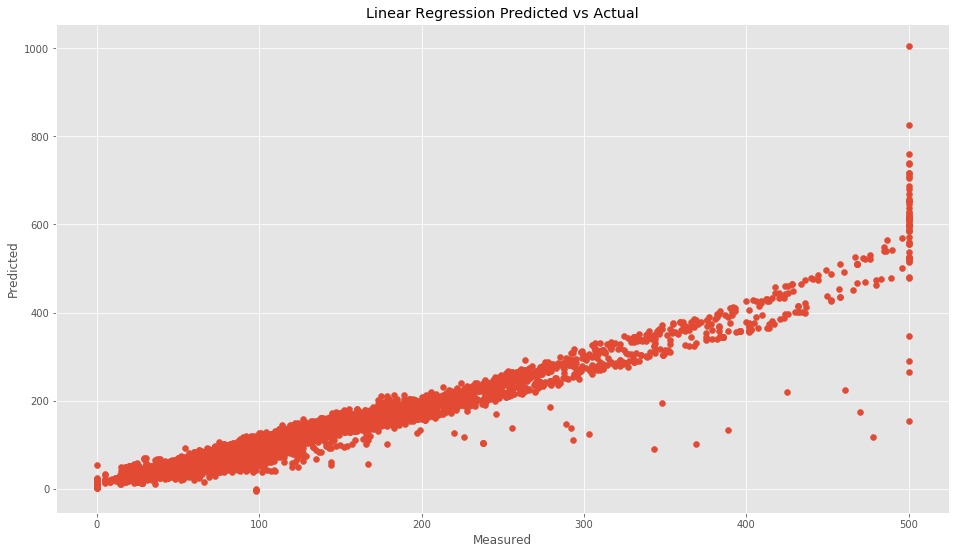

In [37]:
plt.scatter(y_test, lin_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Linear Regression Predicted vs Actual')
plt.show()

In [38]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create MLPRegressor object
mlp = MLPRegressor()

In [39]:
# Train the model using the training sets
mlp.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [40]:
# Score the model
neural_network_regression_score = mlp.score(X_test, y_test)
neural_network_regression_score

0.9960785717622427

In [41]:
# Make predictions using the testing set
nnr_pred = mlp.predict(X_test)

In [42]:
# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, nnr_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, nnr_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, nnr_pred))

Root mean squared error: 5.47
Mean absolute error: 2.93
R-squared: 1.00


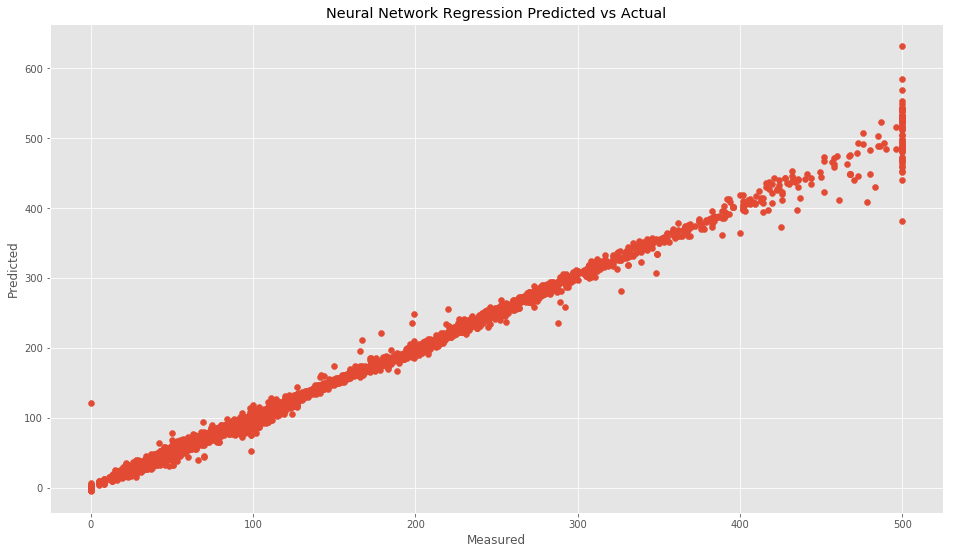

In [43]:
plt.scatter(y_test, nnr_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Neural Network Regression Predicted vs Actual')
plt.show()

In [44]:
from sklearn.linear_model import Lasso

lasso = Lasso()

In [45]:
lasso.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [46]:
# Score the model
lasso_score = lasso.score(X_test, y_test)
lasso_score

0.941672589866151

In [47]:
# Make predictions using the testing set
lasso_pred = lasso.predict(X_test)

In [48]:
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, lasso_pred)))

Root mean squared error: 21.09


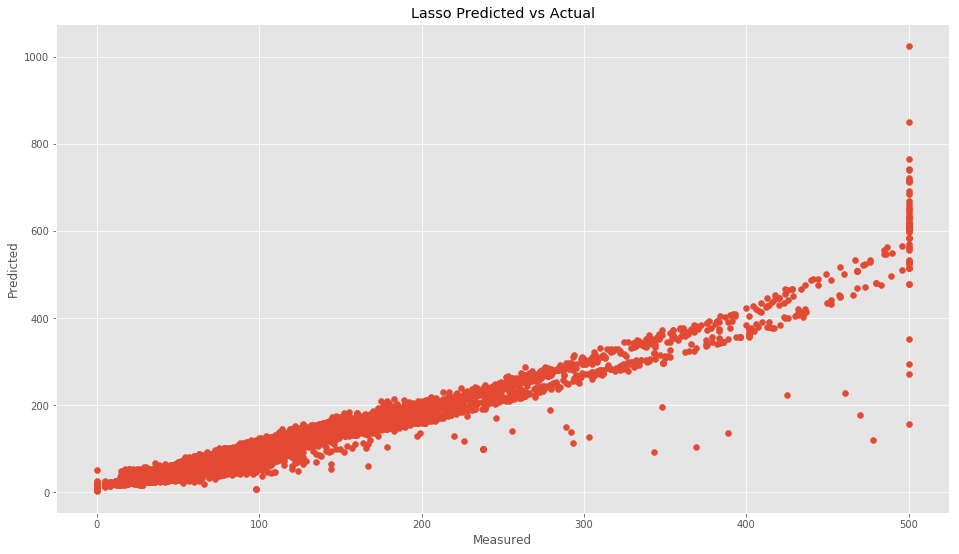

In [49]:
plt.scatter(y_test, lasso_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Lasso Predicted vs Actual')
plt.show()

In [50]:
from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet()

In [51]:
elasticnet.fit(X_train, y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [52]:
elasticnet_score = elasticnet.score(X_test, y_test)
elasticnet_score

0.9417430768867558

In [53]:
elasticnet_pred = elasticnet.predict(X_test)

In [54]:
# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, elasticnet_pred)))

Root mean squared error: 21.07


In [55]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Create Random Forrest Regressor object
regr_rf = RandomForestRegressor(n_estimators=200, random_state=1234)

In [56]:
# Train the model using the training sets
regr_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=1234, verbose=0, warm_start=False)

In [57]:
# Score the model
decision_forest_score = regr_rf.score(X_test, y_test)
decision_forest_score

0.9985917555908991

In [58]:
# Make predictions using the testing set
regr_rf_pred = regr_rf.predict(X_test)

In [59]:
# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, regr_rf_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, regr_rf_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, regr_rf_pred))

Root mean squared error: 3.28
Mean absolute error: 0.26
R-squared: 1.00


In [60]:
X.columns

Index(['so2', 'so2_24h', 'no2', 'no2_24h', 'co', 'co_24h', 'o3', 'o3_24h',
       'o3_8h', 'o3_8h_24h', 'pm10', 'pm10_24h', 'pm2_5', 'pm2_5_24h', 'month',
       'day', 'hour'],
      dtype='object')

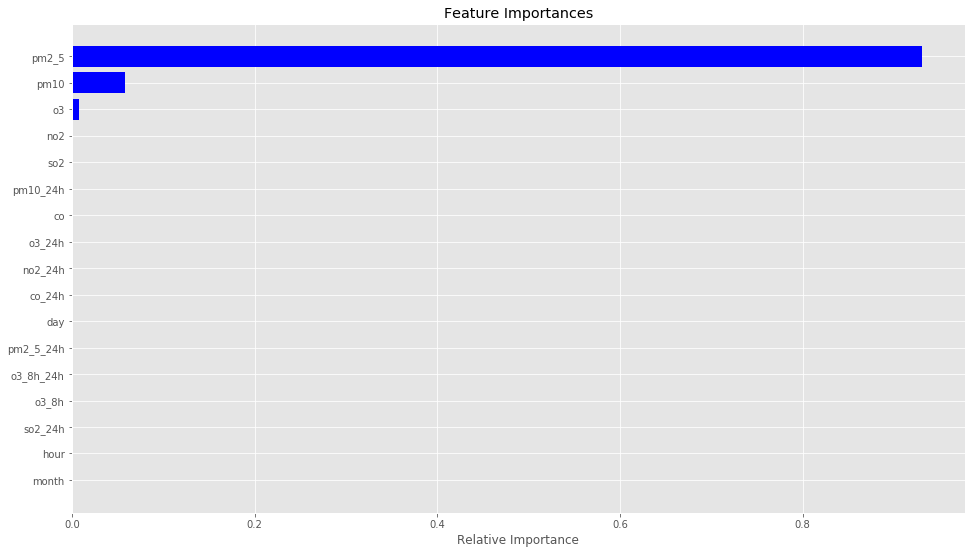

In [61]:
features = X.columns
importances = regr_rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

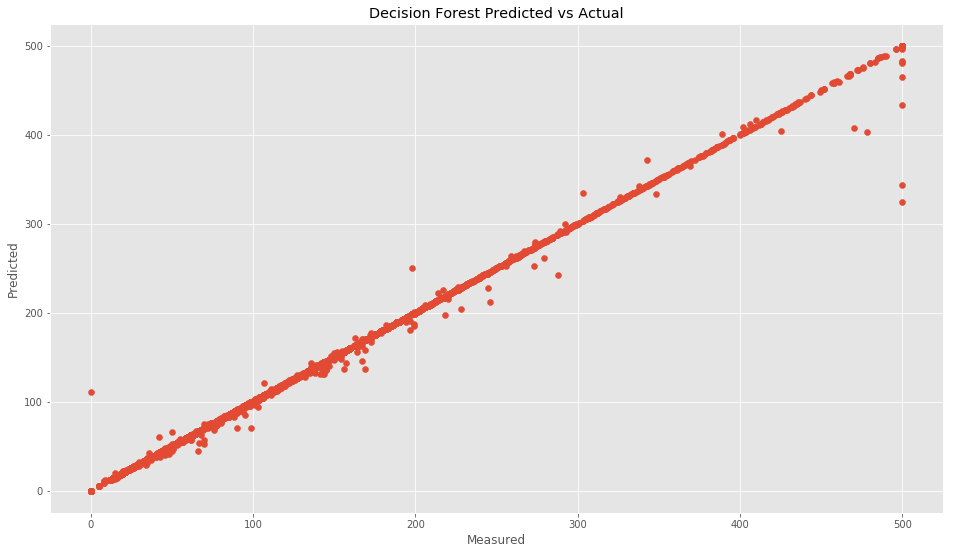

In [62]:
plt.scatter(y_test, regr_rf_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Decision Forest Predicted vs Actual')
plt.show()

In [63]:
from sklearn.ensemble import ExtraTreesRegressor

extra_tree = ExtraTreesRegressor(n_estimators=200, random_state=1234)

In [64]:
extra_tree.fit(X_train, y_train)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
          oob_score=False, random_state=1234, verbose=0, warm_start=False)

In [65]:
extratree_score = extra_tree.score(X_test, y_test)
extratree_score

0.9994259209740165

In [66]:
extratree_pred = extra_tree.predict(X_test)

In [67]:
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, extratree_pred)))

Root mean squared error: 2.09


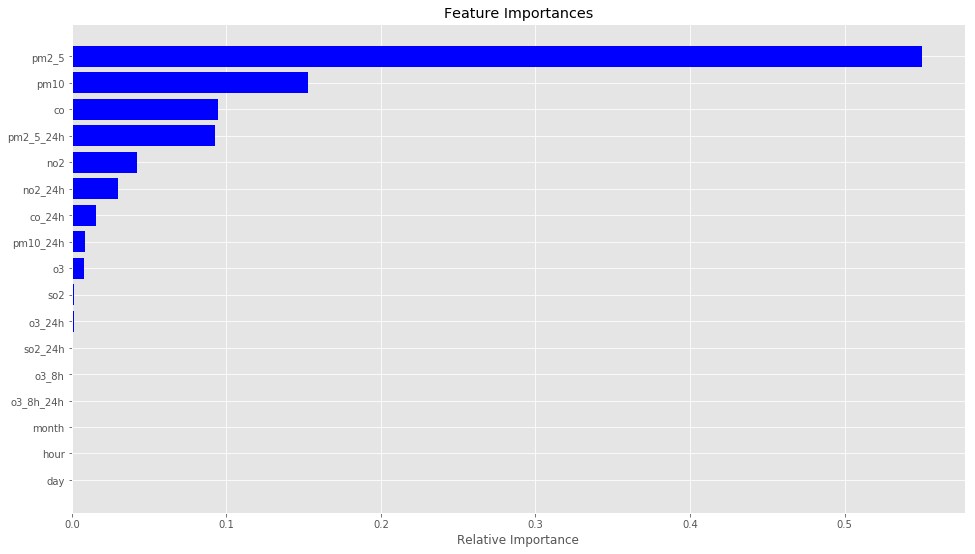

In [68]:
features = X.columns
importances = extra_tree.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

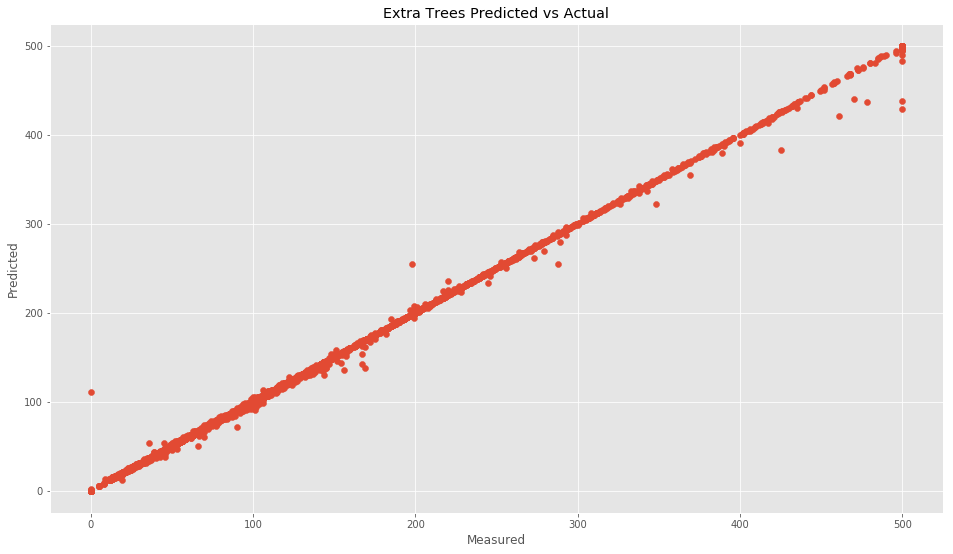

In [69]:
plt.scatter(y_test, extratree_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Extra Trees Predicted vs Actual')
plt.show()

In [70]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create Decision Tree Regressor object
tree_1 = DecisionTreeRegressor()

tree_2 = AdaBoostRegressor(DecisionTreeRegressor(), n_estimators=200, learning_rate=.1)

In [71]:
# Train the model using the training sets
tree_1.fit(X_train, y_train)
tree_2.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=0.1, loss='linear', n_estimators=200,
         random_state=None)

In [72]:
# Score the decision tree model
tree_1.score(X_test, y_test)

0.9986784615836837

In [73]:
# Score the boosted decision tree model
boosted_tree_score = tree_2.score(X_test, y_test)
boosted_tree_score

0.9993118242387217

In [74]:
# Make predictions using the testing set
tree_1_pred = tree_1.predict(X_test)
tree_2_pred = tree_2.predict(X_test)

In [151]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, tree_2_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, tree_2_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, tree_2_pred))

Coefficients: 
 [ -1.41088343e-01   4.53514919e-01  -7.04808666e-04  -1.00717023e-01
  -4.17331735e-01   8.56264480e-01   1.21982202e+00   1.08057793e-01
  -6.75814475e-05  -1.27306655e-01   8.54666596e-02   1.87511571e-02
   7.47335784e-04  -1.72330904e-02   1.05659522e+00   6.28867703e-02
   1.58233482e-03   2.07450778e-02  -7.93708865e-01  -1.04897581e-01
   3.89339547e-03   5.70984701e-02  -1.50800024e+00  -2.38989496e-01
   1.56336072e-03  -4.41195197e-02   2.03435665e-01  -5.48254509e-02
   1.64892326e-01  -1.38913853e-01  -1.58347065e-01   1.13075212e-01]
Root mean squared error: 29.94
Mean absolute error: 12.14
R-squared: 0.72


In [1]:
features = X.columns
importances = tree_2.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

NameError: name 'X' is not defined

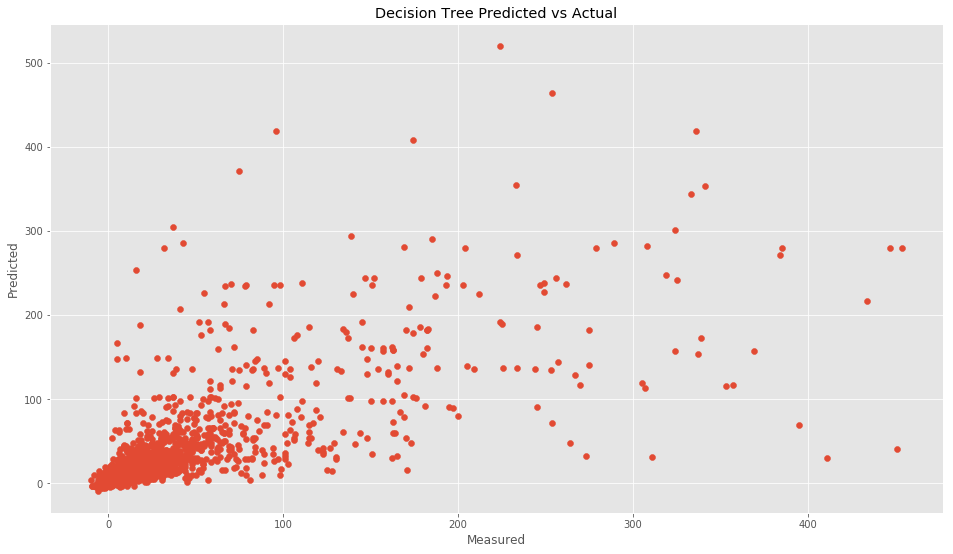

In [153]:
plt.scatter(y_test, tree_1_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Decision Tree Predicted vs Actual')
plt.show()

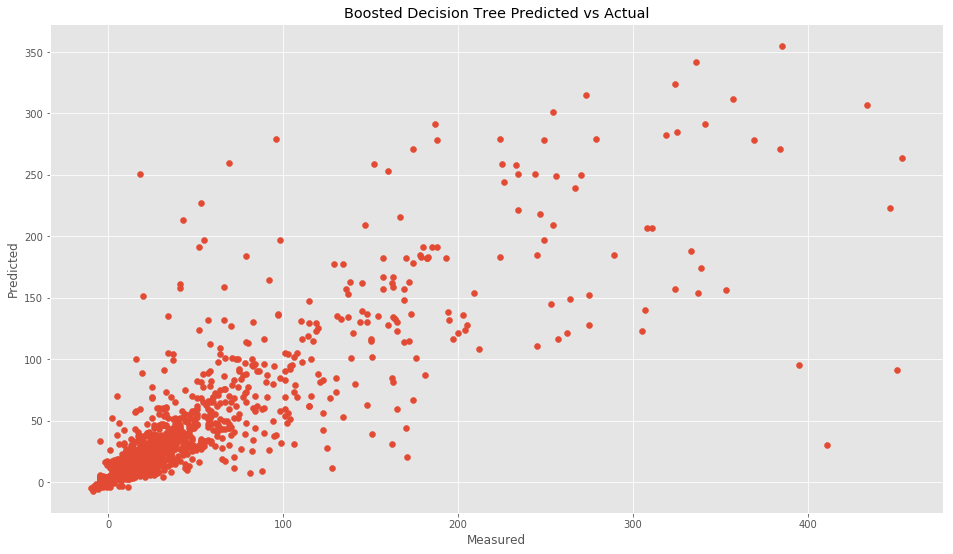

In [154]:
plt.scatter(y_test, tree_2_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Boosted Decision Tree Predicted vs Actual')
plt.show()

### XGBoost

In [77]:
from xgboost.sklearn import XGBRegressor

#Fitting XGB regressor 
xboost = XGBRegressor(n_estimators=200)

ModuleNotFoundError: No module named 'xgboost'

In [156]:
xboost.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [157]:
xgb_score = xboost.score(X_test, y_test)
xgb_score

0.73790452175163934

In [75]:
#Predict 
xboost_pred = xboost.predict(X_test)
xboost_pred.to_csv('sample.csv',index=None)

NameError: name 'xboost' is not defined

In [159]:
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, xboost_pred)))

Root mean squared error: 29.10


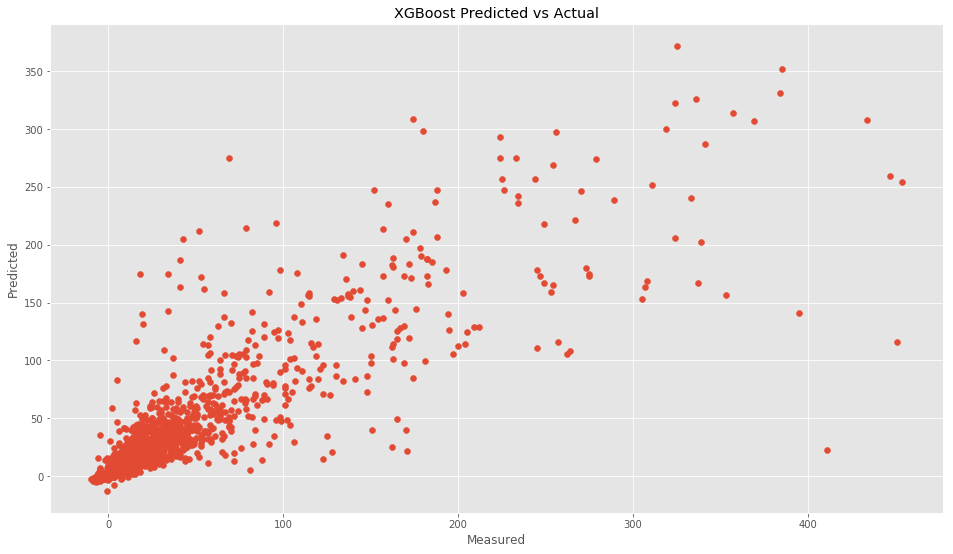

In [160]:
plt.scatter(y_test, xboost_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('XGBoost Predicted vs Actual')
plt.show()

# Evaluate Models

In [161]:
print("Scores:")
print("Linear regression score: ", linear_regression_score)
print("Neural network regression score: ", neural_network_regression_score)
print("Lasso regression score: ", lasso_score)
print("ElasticNet regression score: ", elasticnet_score)
print("Decision forest score: ", decision_forest_score)
print("Extra Trees score: ", extratree_score)
print("Boosted decision tree score: ", boosted_tree_score)
print("XGBoost score:", xgb_score)
print("\n")
print("RMSE:")
print("Linear regression RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, lin_pred)))
print("Neural network RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, nnr_pred)))
print("Lasso RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, lasso_pred)))
print("ElasticNet RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, elasticnet_pred)))
print("Decision forest RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, regr_rf_pred)))
print("Extra Trees RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, extratree_pred)))
print("Boosted decision tree RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, tree_2_pred)))
print("XGBoost RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, xboost_pred)))

Scores:
Linear regression score:  0.696852913754
Neural network regression score:  0.691426715407
Lasso regression score:  0.698482719291
ElasticNet regression score:  0.698156874338
Decision forest score:  0.7348686643
Extra Trees score:  0.734591579855
Boosted decision tree score:  0.722509950764
XGBoost score: 0.737904521752


RMSE:
Linear regression RMSE: 31.29
Neural network RMSE: 31.57
Lasso RMSE: 31.21
ElasticNet RMSE: 31.22
Decision forest RMSE: 29.26
Extra Trees RMSE: 29.28
Boosted decision tree RMSE: 29.94
XGBoost RMSE: 29.10


In [79]:
data_test = pd.read_csv('beijing_cleaned.csv')
result = (regr_rf.predict(data_test))
data_predict['result'] = result
data_predict.to_csv('result.csv',index=None)

ValueError: Number of features of the model must match the input. Model n_features is 17 and input n_features is 19 